In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import fitGS
import fit1QSm
import fitpy10
import fitpy81SAp
import fitpy81SApp
# import fit1Tap
from PHMGS import *
from PHM1QSm import *
from H2_diat import *
from h2sing import *
# print(fit1QSm.fit3d.__doc__)
print(fitpy81SApp.fit3d.__doc__)
print(diathh_sing.__doc__)
# print(diatphm.__doc__)

e = fit3d(r12,r13,r23,der)

Wrapper for ``fit3d``.

Parameters
----------
r12 : input float
r13 : input float
r23 : input float
der : input rank-1 array('d') with bounds (3)

Returns
-------
e : float

ener,der = diathh_sing(r)

Wrapper for ``diathh_sing``.

Parameters
----------
r : input float

Returns
-------
ener : float
der : float



/tmp/ipykernel_222993/2755810795.py:79: UserWarning: The following kwargs were not used by contour: 'ls'
  plt.contour(R12, R23, E, levels=levels_cnt, colors='black', linewidths=0.5, ls=":",alpha=0.5)


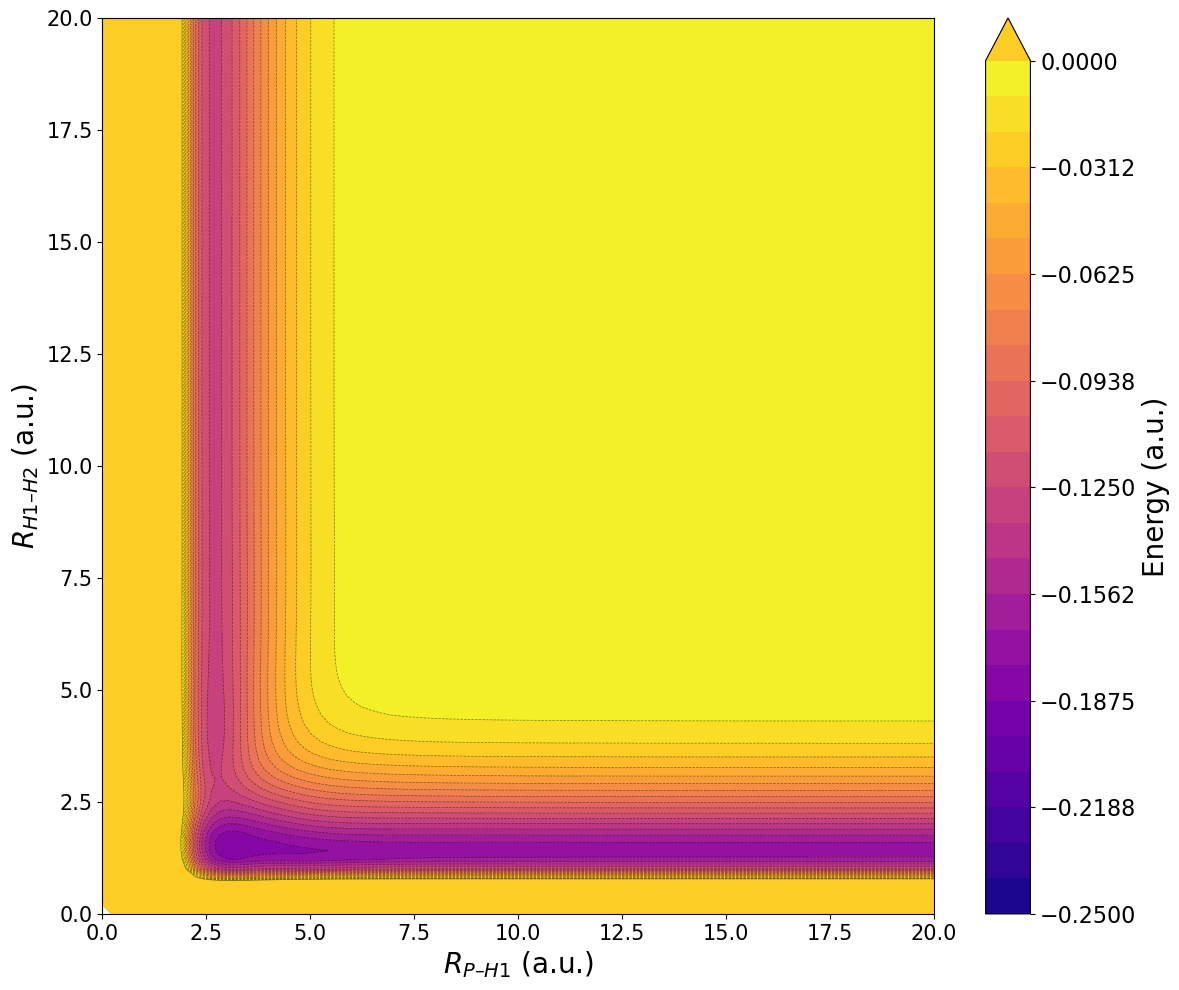

KeyboardInterrupt: 

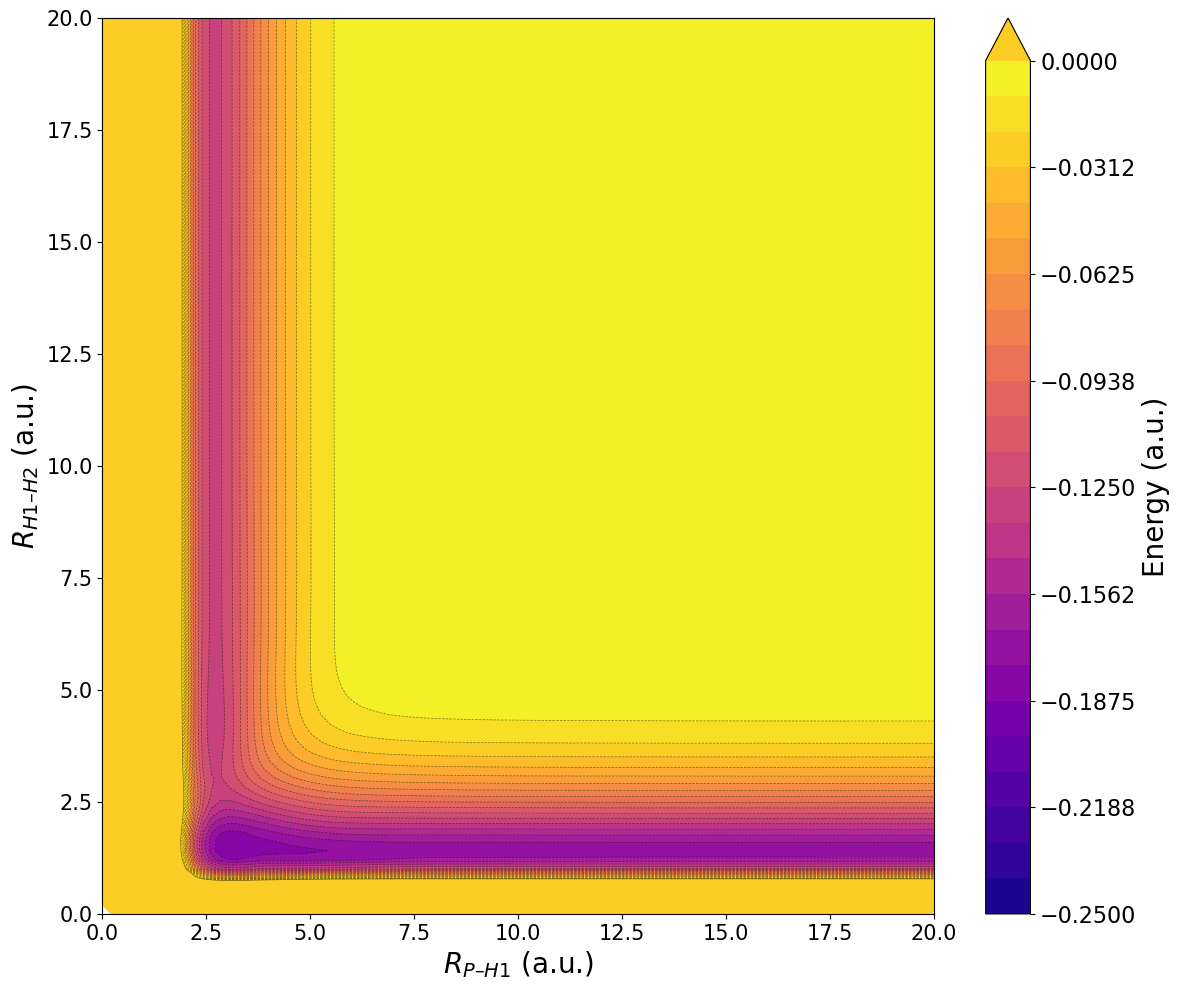

In [2]:
# Ejemplo de función analítica. Reemplaza con tu propia función.
def energia(r_PH1, r_PH2, r_HH):
    if (r_PH1 < 2.0):
        e12=4.70442*np.exp(-0.948769*r_PH1**2)-0.135445
    else:
        e12,d12=diatphm(r_PH1)
    if (r_PH2 < 2.0):
        e13=4.70442*np.exp(-0.948769*r_PH2**2)-0.135445
    else:
        e13,d13=diatphm(r_PH2)
    if (r_HH < 0.74):
        e23=1.33889*r_HH**2 - 2.92997*r_HH + 1.47035
    else:
        e23,d23=diathh(r_HH)

    e12,d12=diatphm(r_PH1)
    e13,d13=diatphm(r_PH2)
    e23,d23=diathh(r_HH)
    # print(r_PH2,e13)
    bod3,bodd3=fitGS.fit3d(r_PH1,r_PH2,r_HH)
    # print(r_PH1,r_PH2,r_HH)
    return bod3 + e12 + e13 + e23

def es_geometria_valida(r12, r13, r23):
    return (
        r12 + r13 > r23 and
        r12 + r23 > r13 and
        r13 + r23 > r12
    )

def get_ic(rg,rp,theta):
    thrad=np.radians(theta)
    r12=((rp*0.50)*(rp*0.50)+rg*rg-2.0*0.50*rp*rg*np.cos(thrad))**0.50
    r13=((rp*0.50)*(rp*0.50)+rg*rg-2.0*0.50*rp*rg*np.cos(np.pi-thrad))**0.50
    r23=rp
    return r12,r13,r23

def energia_con_angulo(r12, r23, theta_rad):
    r13_sq = r12**2 + r23**2 + 2 * r12 * r23 * np.cos(theta_rad)
    if r13_sq <= 0:
        return np.nan  # geometría inválida
    r13 = np.sqrt(r13_sq)
    return energia(r12, r13, r23)

angle = [0.00, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0]
angle = np.linspace(0,180,6)
angle = [0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0,110.0,120.0,130.0,140.0,150.0,160.0,170.0,180.0]

for ang in angle:
    # Malla
    r12_vals = np.linspace(0.0, 20.0, 100)
    r23_vals = np.linspace(0.0, 20.0, 100)
    R12, R23 = np.meshgrid(r12_vals, r23_vals)
    E = np.zeros_like(R12)
    theta_rad = np.radians(ang)

    # Calcular energía
    for i in range(R12.shape[0]):
        for j in range(R12.shape[1]):
            E[i, j] = energia_con_angulo(R12[i,j],R23[i,j],theta_rad)
            # if es_geometria_valida(R12[i,j],theta_rad,R23[i,j]):
                # E[i, j] = energia(R12[i, j], theta_rad, R23[i, j])

    # Colormap completo entre vmin y vmax
    vmin = -0.25
    vmax = 0.0
    levels = np.linspace(vmin, vmax, 25)  # 100 niveles hasta 0.0, sin más
    levels_cnt = np.linspace(vmin, vmax, 25)  # 100 niveles hasta 0.0, sin más

    # Colormap y norm
    cmap = plt.get_cmap('gnuplot').copy()
    cmap = plt.get_cmap('plasma').copy()
    cmap.set_over(cmap(0.9))  # color para energías > vmax (amarillo brillante)
    norm = Normalize(vmin=vmin, vmax=vmax, clip=False)

    # Graficar
    plt.figure(figsize=(12, 10))
    cp = plt.contourf(R12, R23, E, levels=levels, cmap=cmap, norm=norm, extend='max')
    plt.contour(R12, R23, E, levels=levels_cnt, colors='black', linewidths=0.5, ls=":",alpha=0.5)
    cbar=plt.colorbar(cp, label='Energy (u.a.)')
    plt.xlabel(r'$R_{P–H1}$ (a.u.)',fontsize=20)
    plt.ylabel(r'$R_{H1–H2}$ (a.u.)',fontsize=20)
    plt.tick_params(axis='both',labelsize=15)
    cbar.set_label('Energy (a.u.)', fontsize=20)  # texto del label
    cbar.ax.tick_params(labelsize=16)
    # plt.title(r"1 $^3$A'' (P–H2 fix at "+ str(ang) + " a.u.)")
    plt.tight_layout()
    plt.savefig("1TApp_"+str(ang)+".png", dpi=300,transparent=True)
    plt.show()
 

/tmp/ipykernel_357909/1383236905.py:79: UserWarning: The following kwargs were not used by contour: 'ls'
  plt.contour(R12, R23, E, levels=levels_cnt, colors='black', linewidths=0.5, ls=":",alpha=0.5)


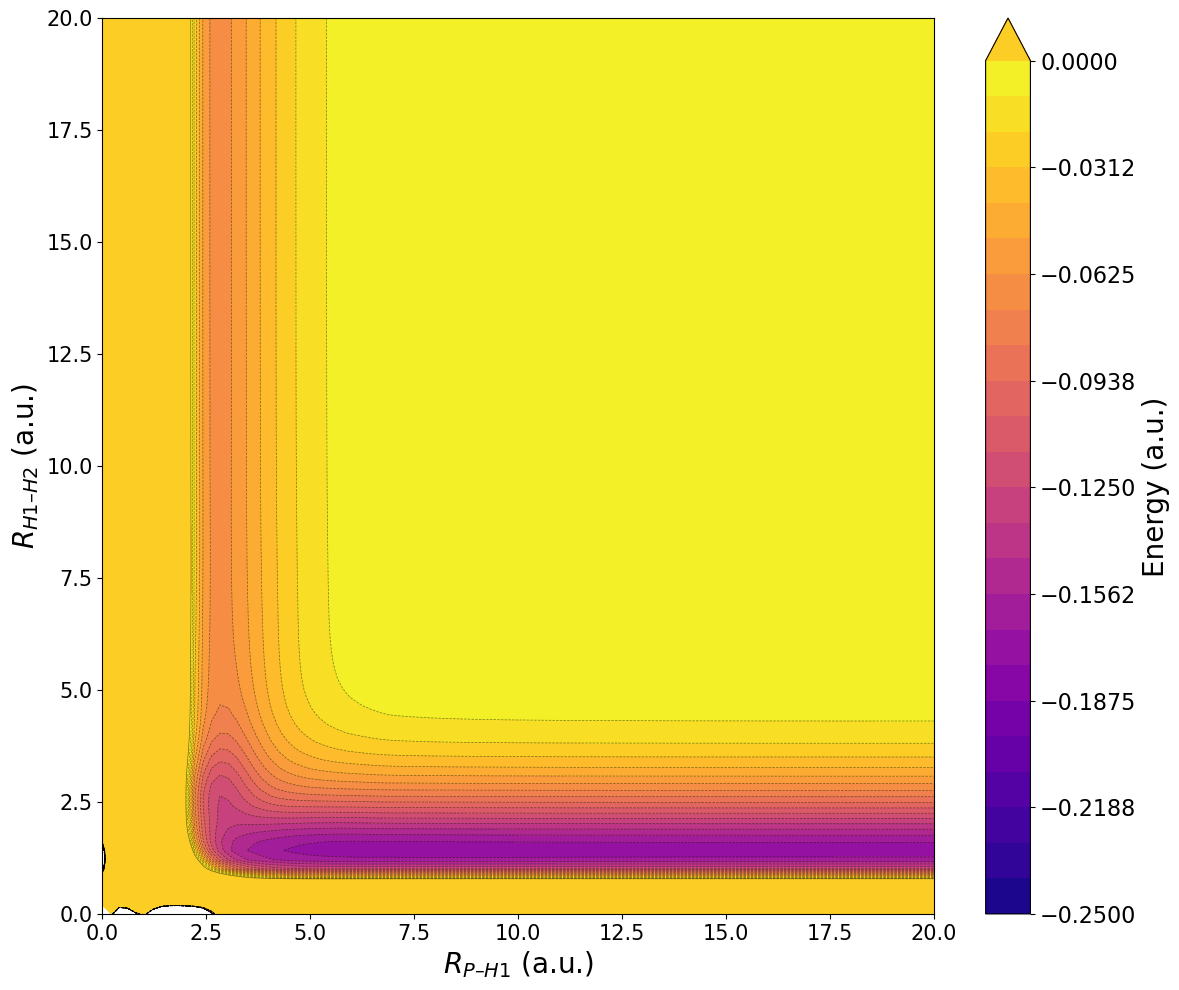

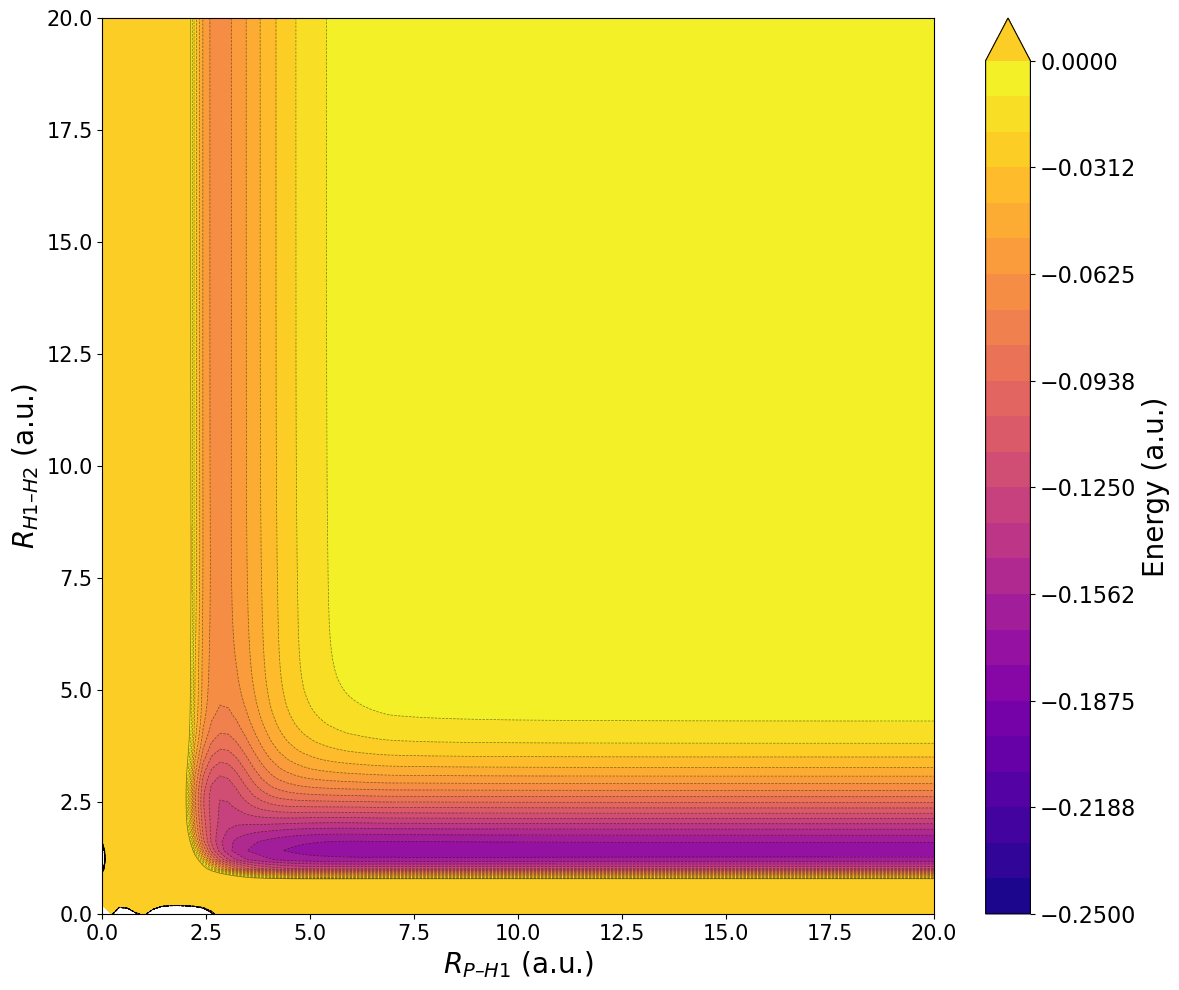

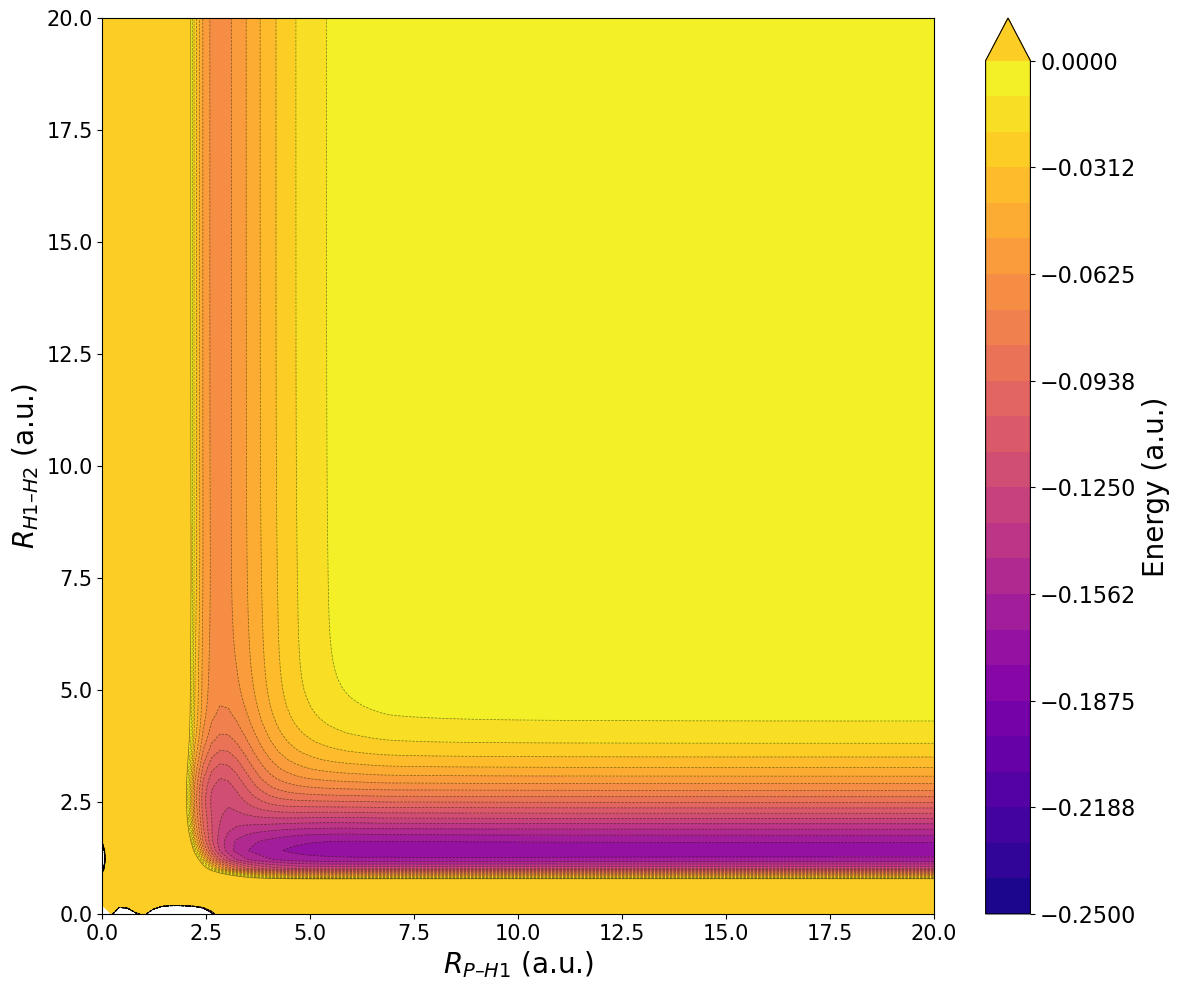

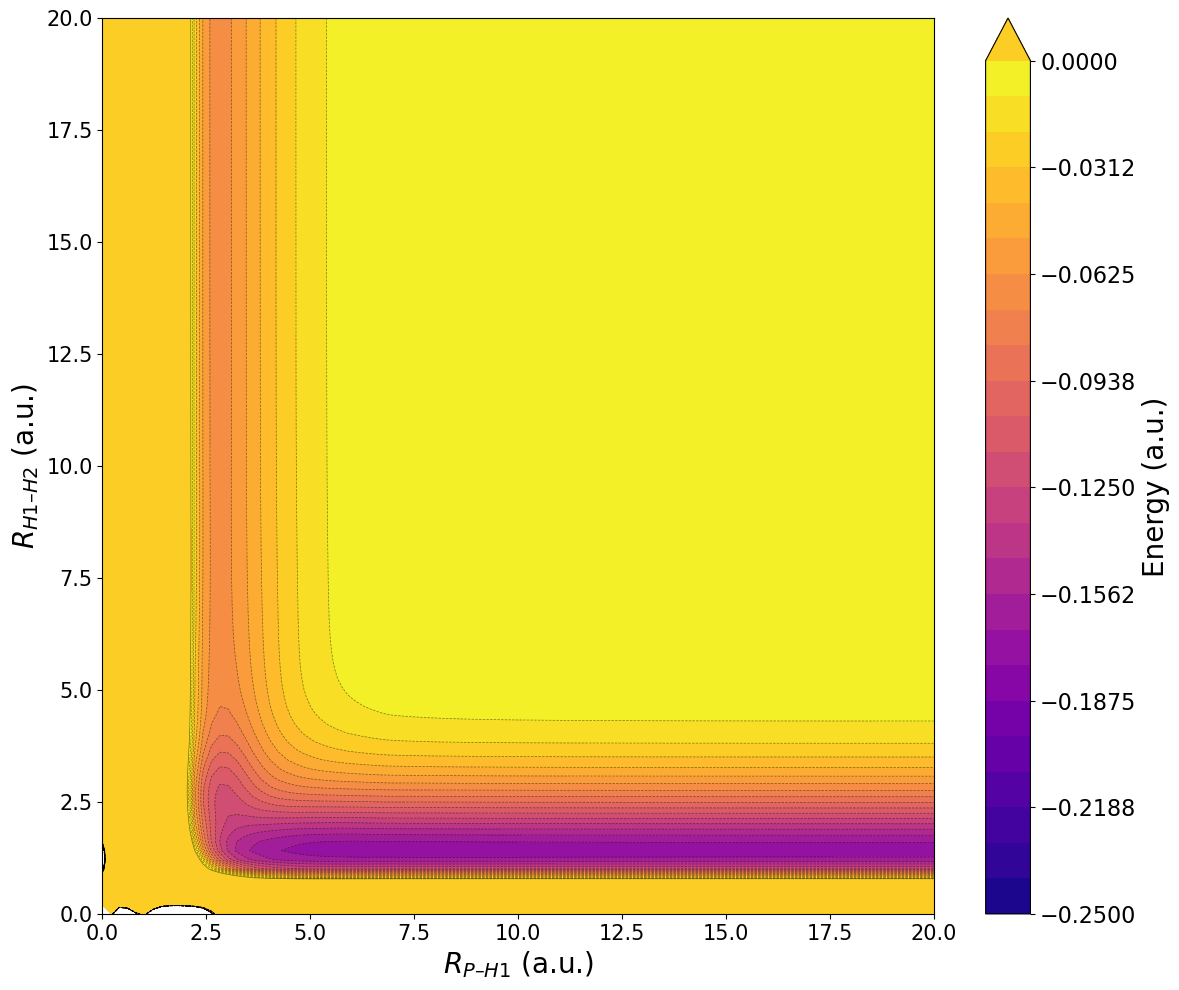

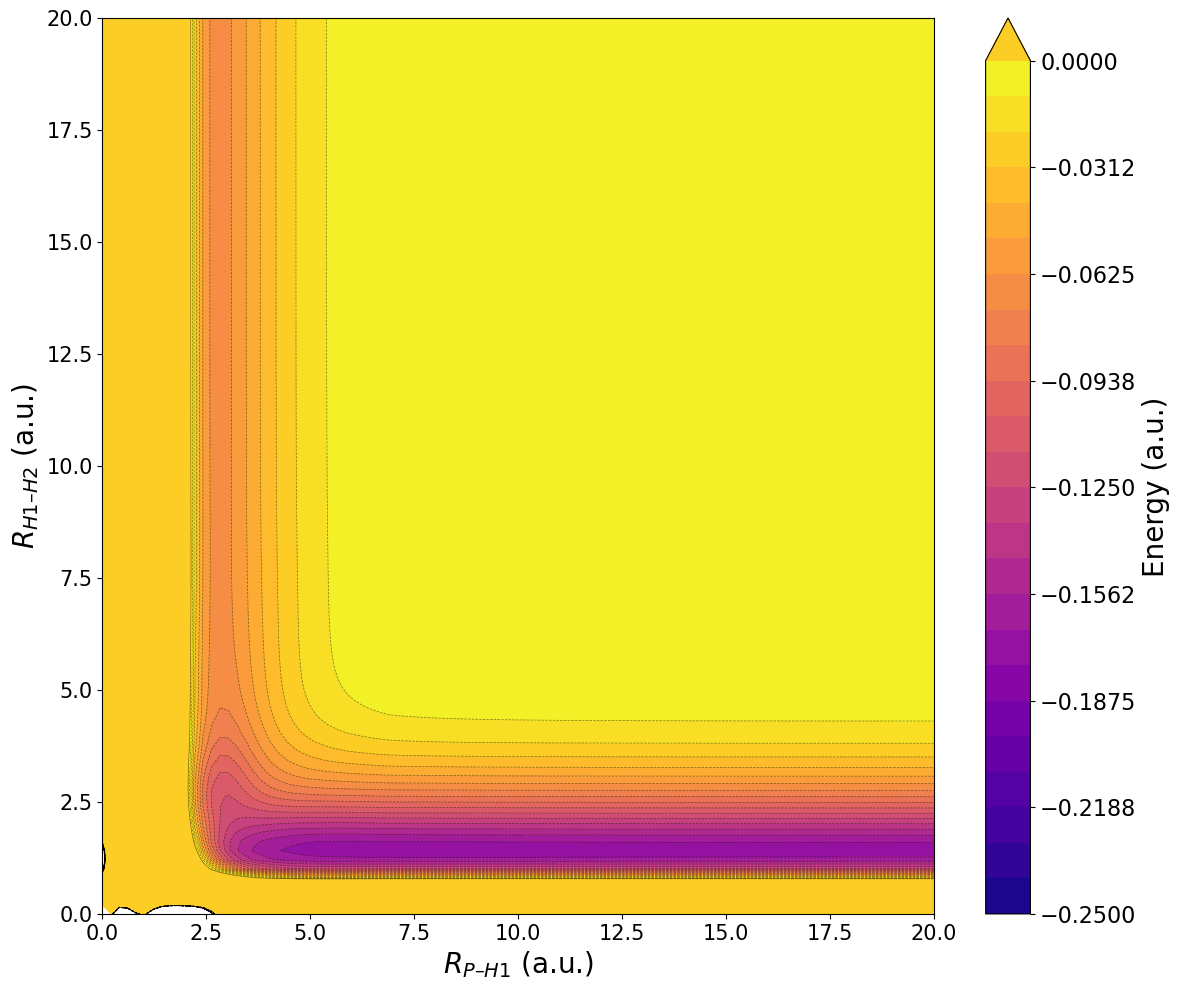

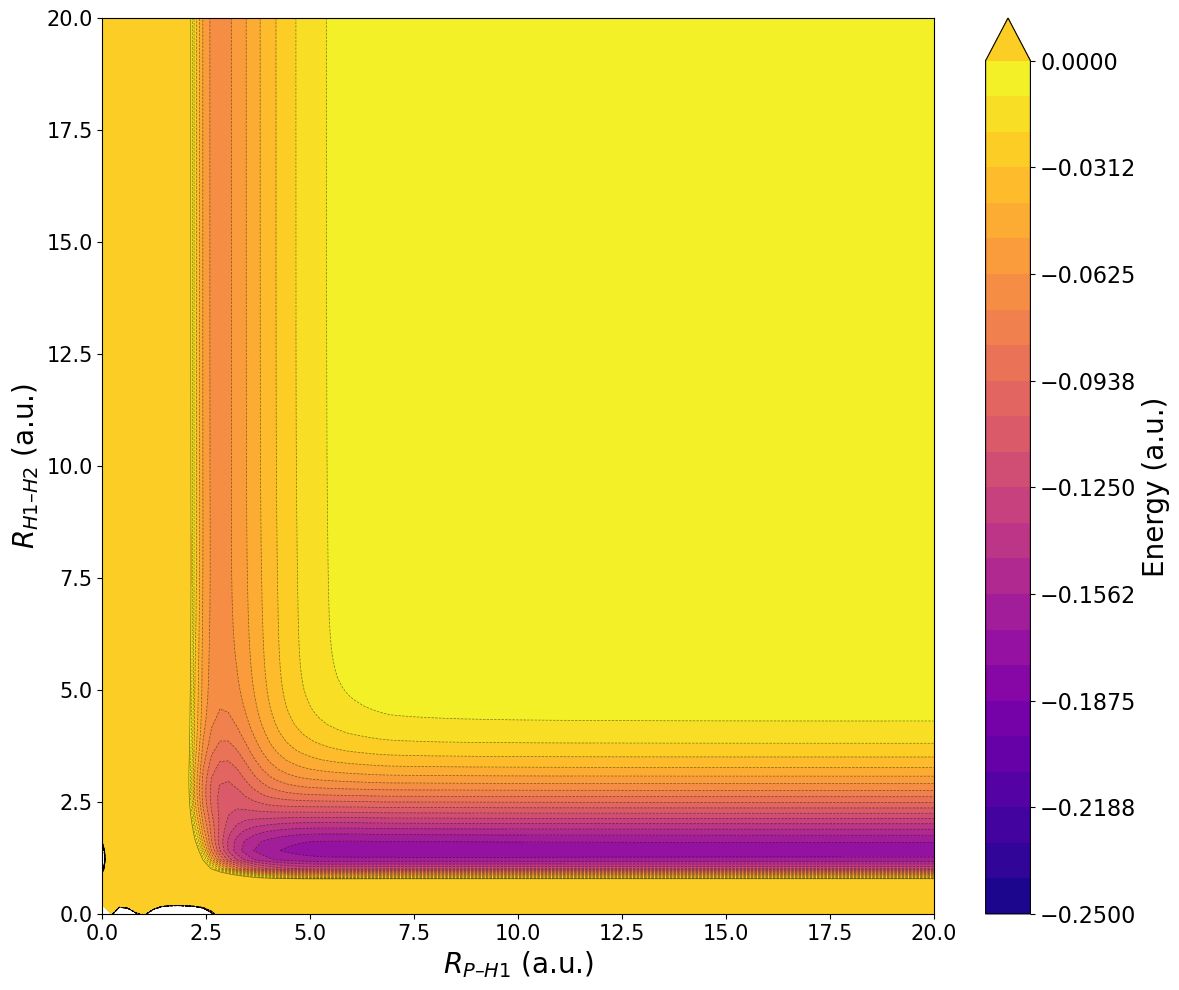

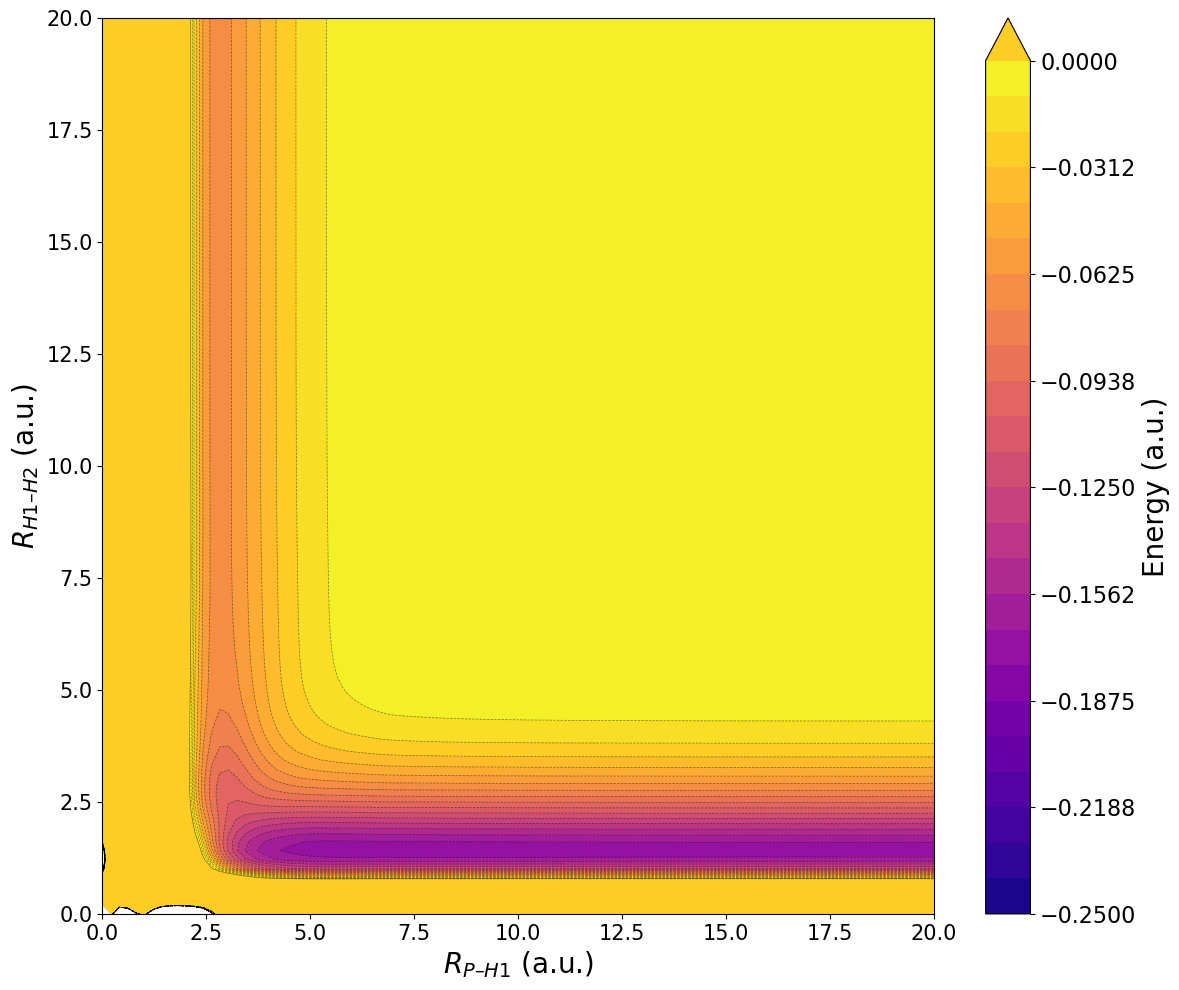

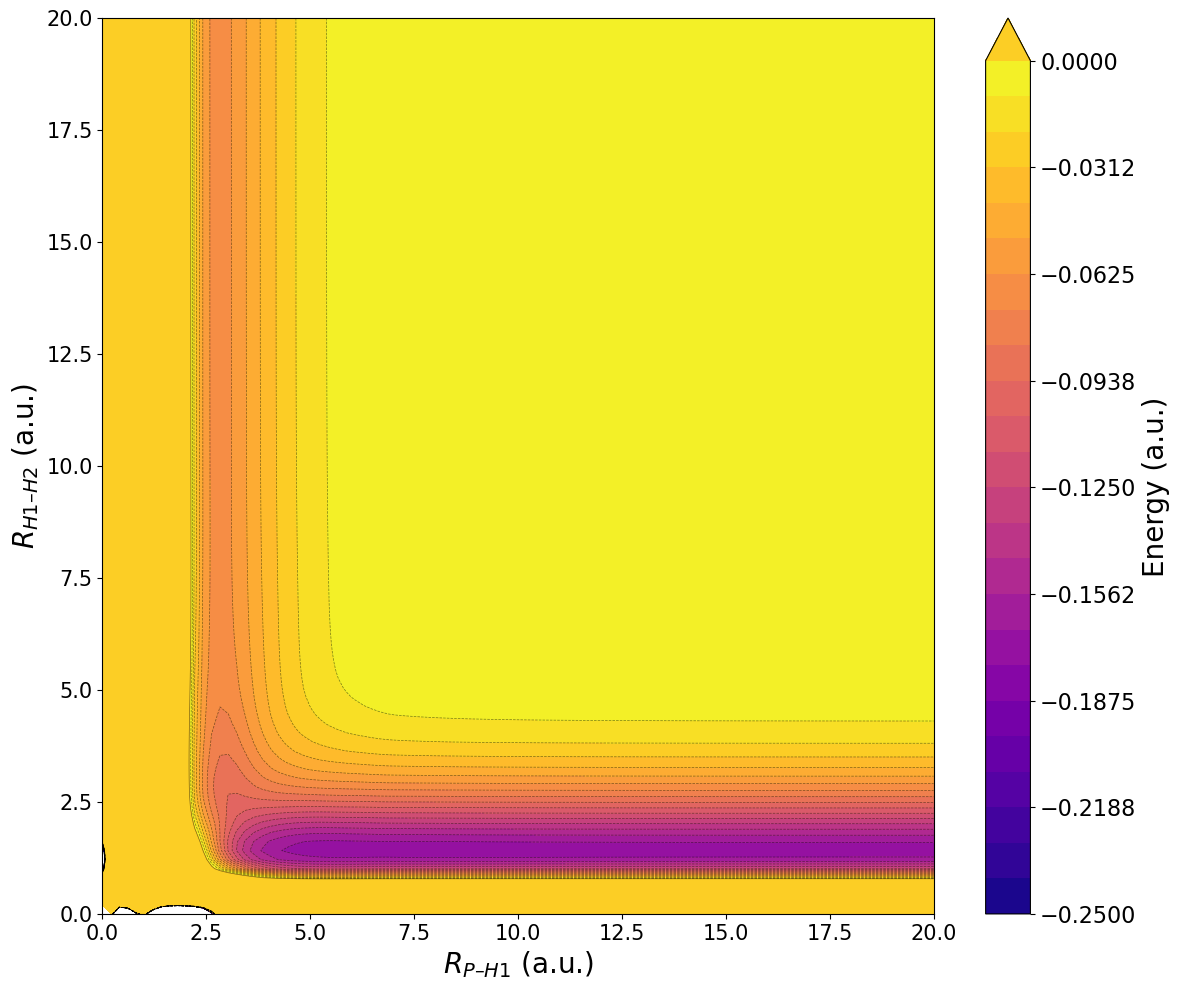

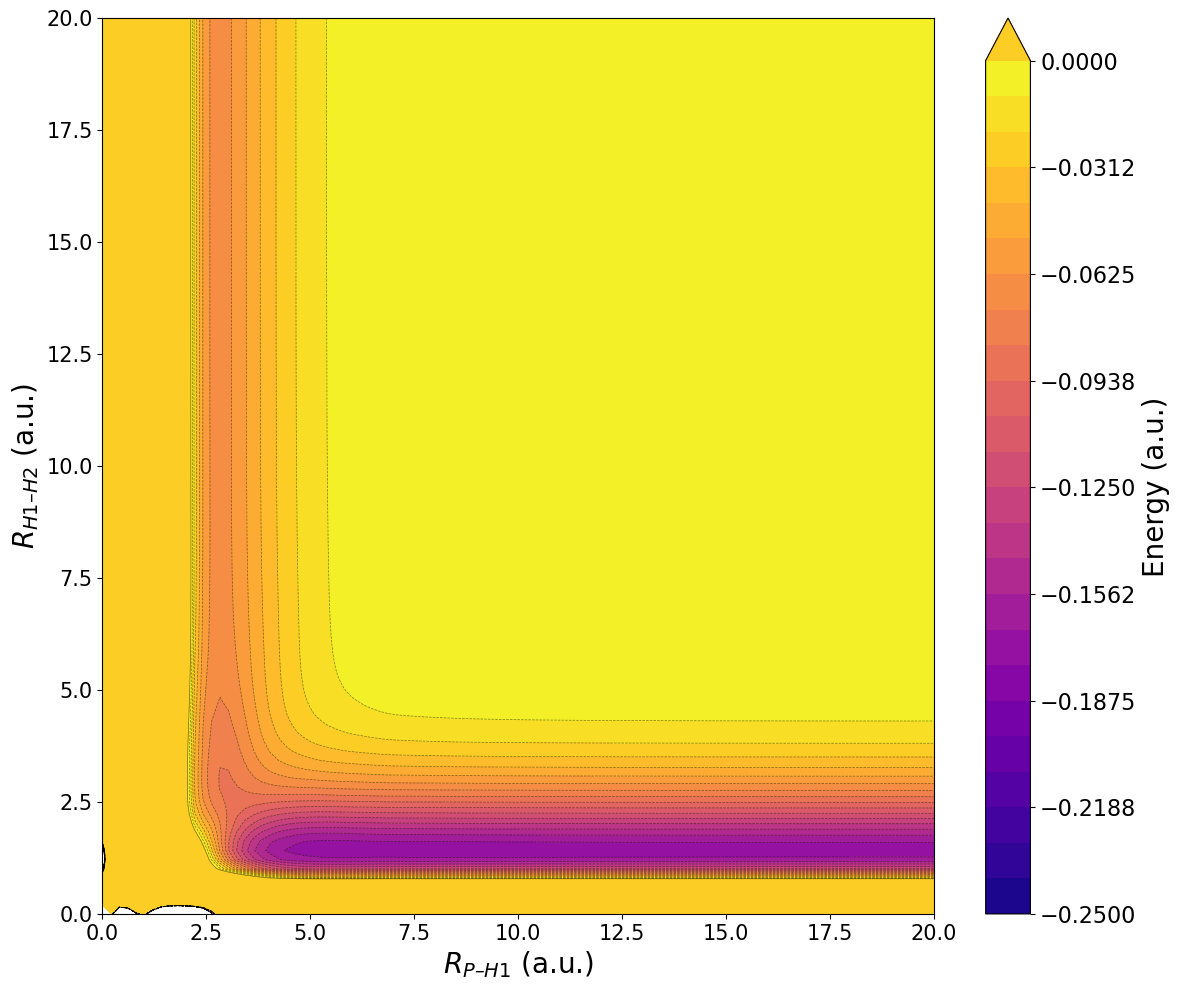

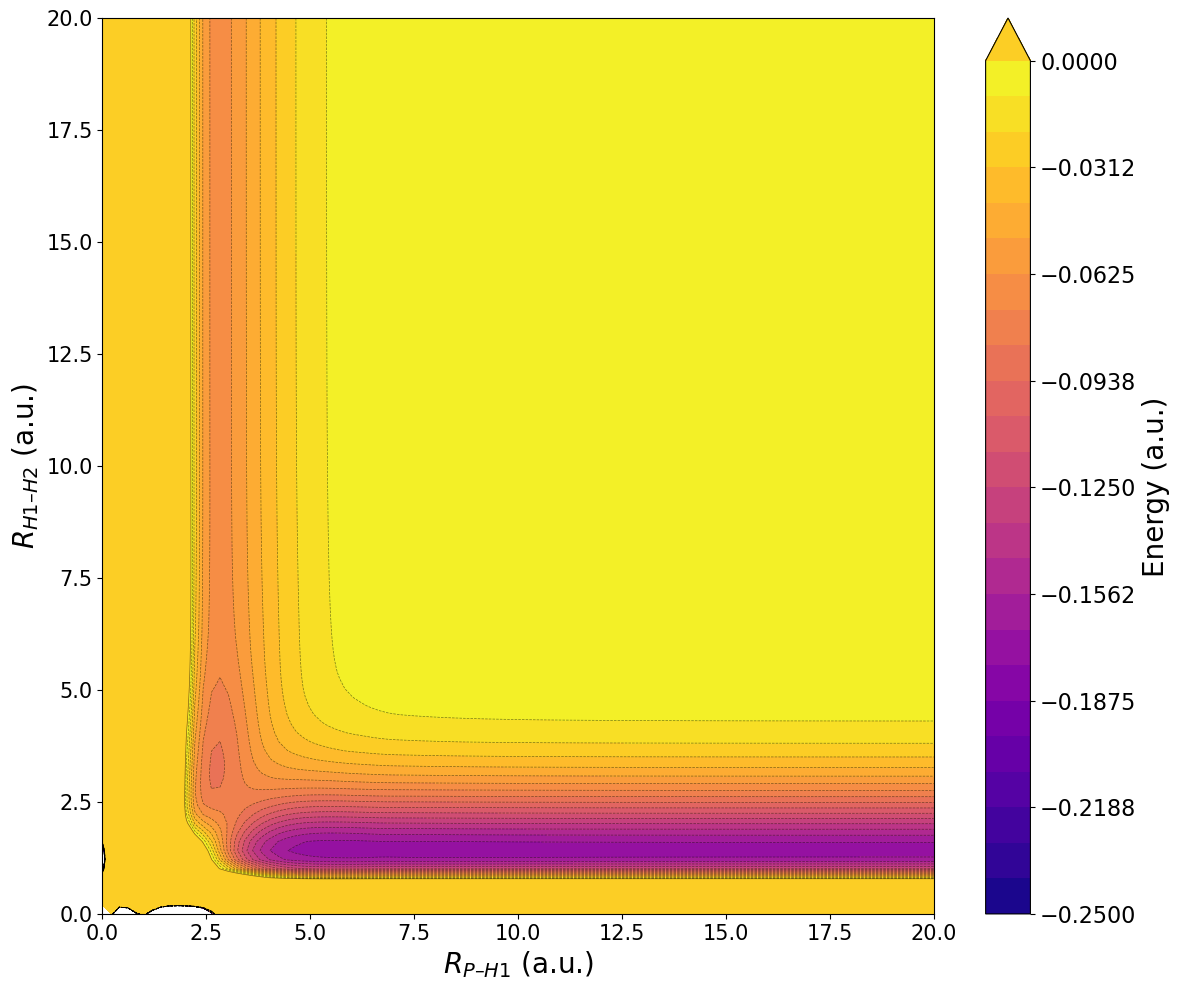

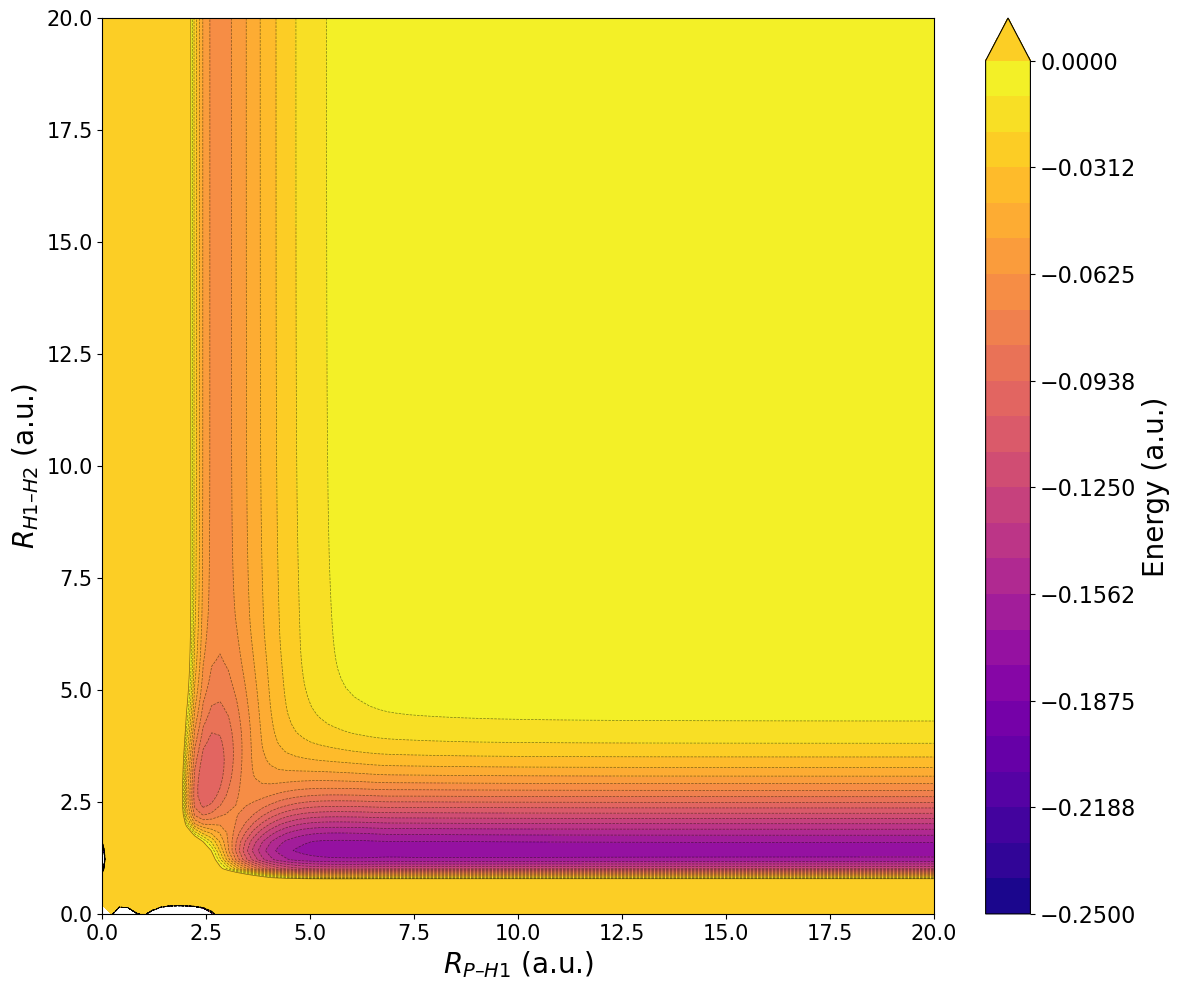

KeyboardInterrupt: 

In [5]:
# Ejemplo de función analítica. Reemplaza con tu propia función.
def energia(r_PH1, r_PH2, r_HH):
    if r_PH1 < 2.0:
        e12 = 0.309099*r_PH1**2.0-1.57688*r_PH1+1.95195
    else:
        e12,d12 = diat1qsm(r_PH1)
    
    if r_PH2 < 2.0:
        e13 = 0.309099*r_PH2**2.0-1.57688*r_PH2+1.95195
    else:
        e13,d13 = diat1qsm(r_PH2)

    if r_HH < 0.74:
        e23 = 1.33889*r_HH**2.0-2.92997*r_HH+1.47035
    else:
        e23,d23 = diathh(r_HH)

    bod3,bodd3=fit1QSm.fit3d(r_PH1,r_PH2,r_HH)
    # print(r_PH1,r_PH2,r_HH)
    return bod3 + e12 + e13 + e23

def es_geometria_valida(r12, r13, r23):
    return (
        r12 + r13 > r23 and
        r12 + r23 > r13 and
        r13 + r23 > r12
    )

def get_ic(rg,rp,theta):
    thrad=np.radians(theta)
    r12=((rp*0.50)*(rp*0.50)+rg*rg-2.0*0.50*rp*rg*np.cos(thrad))**0.50
    r13=((rp*0.50)*(rp*0.50)+rg*rg-2.0*0.50*rp*rg*np.cos(np.pi-thrad))**0.50
    r23=rp
    return r12,r13,r23

def energia_con_angulo(r12, r23, theta_rad):
    r13_sq = r12**2 + r23**2 + 2 * r12 * r23 * np.cos(theta_rad)
    if r13_sq <= 0:
        return np.nan  # geometría inválida
    r13 = np.sqrt(r13_sq)
    return energia(r12, r13, r23)

angle = [0.00, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0]
angle = np.linspace(0,180,6)
angle = [0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0,110.0,120.0,130.0,140.0,150.0,160.0,170.0,180.0]
# angle = [0.0]

for ang in angle:
    # Malla
    r12_vals = np.linspace(0.0, 20.0, 100)
    r23_vals = np.linspace(0.0, 20.0, 100)
    R12, R23 = np.meshgrid(r12_vals, r23_vals)
    E = np.zeros_like(R12)
    theta_rad = np.radians(ang)


    # Calcular energía
    for i in range(R12.shape[0]):
        for j in range(R12.shape[1]):
            E[i, j] = energia_con_angulo(R12[i,j],R23[i,j],theta_rad)
            # if es_geometria_valida(R12[i,j],theta_rad,R23[i,j]):
                # E[i, j] = energia(R12[i, j], theta_rad, R23[i, j])

    # Colormap completo entre vmin y vmax
    vmin = -0.25
    vmax = 0.0
    levels = np.linspace(vmin, vmax, 25)  # 100 niveles hasta 0.0, sin más
    levels_cnt = np.linspace(vmin, vmax, 25)  # 100 niveles hasta 0.0, sin más

    # Colormap y norm
    cmap = plt.get_cmap('gnuplot').copy()
    cmap = plt.get_cmap('plasma').copy()
    cmap.set_over(cmap(0.9))  # color para energías > vmax (amarillo brillante)
    norm = Normalize(vmin=vmin, vmax=vmax, clip=False)

    # Graficar
    plt.figure(figsize=(12, 10))
    cp = plt.contourf(R12, R23, E, levels=levels, cmap=cmap, norm=norm, extend='max')
    plt.contour(R12, R23, E, levels=levels_cnt, colors='black', linewidths=0.5, ls=":",alpha=0.5)
    cbar=plt.colorbar(cp, label='Energy (u.a.)')
    plt.xlabel(r'$R_{P–H1}$ (a.u.)',fontsize=20)
    plt.ylabel(r'$R_{H1–H2}$ (a.u.)',fontsize=20)
    plt.tick_params(axis='both',labelsize=15)
    cbar.set_label('Energy (a.u.)', fontsize=20)  # texto del label
    cbar.ax.tick_params(labelsize=16)
    # plt.title(r"1 $^3$A'' (P–H2 fix at "+ str(ang) + " a.u.)")
    plt.tight_layout()
    plt.savefig("2TApp_"+str(ang)+".png", dpi=300,transparent=True)
    plt.show()
 

In [ ]:
# Ejemplo de función analítica. Reemplaza con tu propia función.
# def energia(r_PH1, r_PH2, r_HH):
#     if (r_PH1 < 2.0):
#         e12=4.70442*np.exp(-0.948769*r_PH1**2)-0.135445
#     else:
#         e12,d12=diatphm(r_PH1)
#     if (r_PH2 < 2.0):
#         e13=4.70442*np.exp(-0.948769*r_PH2**2)-0.135445
#     else:
#         e13,d13=diatphm(r_PH2)
#     if (r_HH < 0.74):
#         e23=1.33889*r_HH**2 - 2.92997*r_HH + 1.47035
#     else:
#         e23,d23=diathh(r_HH)

#     e12,d12=diatphm(r_PH1)
#     e13,d13=diatphm(r_PH2)
#     e23,d23=diathh(r_HH)
#     # print(r_PH2,e13)
#     bodd3=[0,0,0]
#     bod3=fitpy8.fit3d(r_PH1,r_PH2,r_HH,bodd3)
#     # print(r_PH1,r_PH2,r_HH)
#     return bod3 + e12 + e13 + e23

def es_geometria_valida(r12, r13, r23):
    return (
        r12 + r13 > r23 and
        r12 + r23 > r13 and
        r13 + r23 > r12
    )

def get_ic(rg,rp,theta):
    thrad=np.radians(theta)
    r12=((rp*0.50)*(rp*0.50)+rg*rg-2.0*0.50*rp*rg*np.cos(thrad))**0.50
    r13=((rp*0.50)*(rp*0.50)+rg*rg-2.0*0.50*rp*rg*np.cos(np.pi-thrad))**0.50
    r23=rp
    return r12,r13,r23

def energia_con_angulo(r12, r23, theta_rad):
    r13_sq = r12**2 + r23**2 + 2 * r12 * r23 * np.cos(theta_rad)
    if r13_sq <= 0:
        return np.nan  # geometría inválida
    r13 = np.sqrt(r13_sq)
    return energia1SApp(r12, r13, r23)

angle = [0.00, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0]
angle = np.linspace(0,180,6)
angle = [0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0,110.0,120.0,130.0,140.0,150.0,160.0,170.0,180.0]

for ang in angle:
    # Malla
    r12_vals = np.linspace(0.0, 20.0, 100)
    r23_vals = np.linspace(0.0, 20.0, 100)
    R12, R23 = np.meshgrid(r12_vals, r23_vals)
    E = np.zeros_like(R12)
    theta_rad = np.radians(ang)

    # Calcular energía
    for i in range(R12.shape[0]):
        for j in range(R12.shape[1]):
            E[i, j] = energia_con_angulo(R12[i,j],R23[i,j],theta_rad)
            # if es_geometria_valida(R12[i,j],theta_rad,R23[i,j]):
                # E[i, j] = energia(R12[i, j], theta_rad, R23[i, j])

    # Colormap completo entre vmin y vmax
    vmin = -0.25
    vmax = 0.0
    levels = np.linspace(vmin, vmax, 25)  # 100 niveles hasta 0.0, sin más
    levels_cnt = np.linspace(vmin, vmax, 25)  # 100 niveles hasta 0.0, sin más

    # Colormap y norm
    cmap = plt.get_cmap('gnuplot').copy()
    cmap = plt.get_cmap('plasma').copy()
    cmap.set_over(cmap(0.9))  # color para energías > vmax (amarillo brillante)
    norm = Normalize(vmin=vmin, vmax=vmax, clip=False)

    # Graficar
    plt.figure(figsize=(12, 10))
    cp = plt.contourf(R12, R23, E, levels=levels, cmap=cmap, norm=norm, extend='max')
    plt.contour(R12, R23, E, levels=levels_cnt, colors='black', linewidths=0.5, ls=":",alpha=0.5)
    cbar=plt.colorbar(cp, label='Energy (u.a.)')
    plt.xlabel(r'$R_{P–H1}$ (a.u.)',fontsize=20)
    plt.ylabel(r'$R_{H1–H2}$ (a.u.)',fontsize=20)
    plt.tick_params(axis='both',labelsize=15)
    cbar.set_label('Energy (a.u.)', fontsize=20)  # texto del label
    cbar.ax.tick_params(labelsize=16)
    # plt.title(r"1 $^3$A'' (P–H2 fix at "+ str(ang) + " a.u.)")
    plt.tight_layout()
    # plt.savefig("1TAp_"+str(ang)+".png", dpi=300,transparent=True)
    plt.show()
 

In [7]:
def energia1TApp(r_PH1, r_PH2, r_HH):
    if (r_PH1 < 2.0):
        e12=4.70442*np.exp(-0.948769*r_PH1**2)-0.135445
    else:
        e12,d12=diatphm(r_PH1)
    if (r_PH2 < 2.0):
        e13=4.70442*np.exp(-0.948769*r_PH2**2)-0.135445
    else:
        e13,d13=diatphm(r_PH2)

    if (r_HH < 0.74):
        e23=1.33889*r_HH**2 - 2.92997*r_HH + 1.47035
    else:
        e23,d23=diathh(r_HH)

    e12,d12=diatphm(r_PH1)
    e13,d13=diatphm(r_PH2)
    e23,d23=diathh(r_HH)
    # print(r_PH2,e13)
    bod3,bodd3=fitGS.fit3d(r_PH1,r_PH2,r_HH)
    # print(r_PH1,r_PH2,r_HH)
    return bod3 + e12 + e13 + e23

def energia1TApp_JAC(rg,rp,theta):
    r_PH1, r_PH2, r_HH = get_ic(rg,rp,theta)

    e12,d12=diatphm(r_PH1)
    e13,d13=diatphm(r_PH2)
    e23,d23=diathh(r_HH)
    
    bod3,bodd3=fitGS.fit3d(r_PH1,r_PH2,r_HH)
    
    return bod3 + e12 + e13 + e23

def energia2TApp(r_PH1, r_PH2, r_HH):
    if r_PH1 < 2.0:
        e12 = 0.309099*r_PH1**2.0-1.57688*r_PH1+1.95195
    else:
        e12,d12 = diat1qsm(r_PH1)
    
    if r_PH2 < 2.0:
        e13 = 0.309099*r_PH2**2.0-1.57688*r_PH2+1.95195
    else:
        e13,d13 = diat1qsm(r_PH2)

    if r_HH < 0.74:
        e23 = 1.33889*r_HH**2.0-2.92997*r_HH+1.47035
    else:
        e23,d23 = diathh(r_HH)

    bod3,bodd3=fit1QSm.fit3d(r_PH1,r_PH2,r_HH)
    
    return bod3 + e12 + e13 + e23

def energia2TApp_JAC(rg,rp,theta):
    r_PH1, r_PH2, r_HH = get_ic(rg,rp,theta)
    
    if r_PH1 < 2.0:
        e12 = 0.309099*r_PH1**2.0-1.57688*r_PH1+1.95195
    else:
        e12,d12 = diat1qsm(r_PH1)
    
    if r_PH2 < 2.0:
        e13 = 0.309099*r_PH2**2.0-1.57688*r_PH2+1.95195
    else:
        e13,d13 = diat1qsm(r_PH2)

    if r_HH < 0.74:
        e23 = 1.33889*r_HH**2.0-2.92997*r_HH+1.47035
    else:
        e23,d23 = diathh(r_HH)

    bod3,bodd3=fit1QSm.fit3d(r_PH1,r_PH2,r_HH)
    
    return bod3 + e12 + e13 + e23

# Ejemplo de función analítica. Reemplaza con tu propia función.
def energia1TAp(r_PH1, r_PH2, r_HH):
    if (r_PH1 < 2.0):
        e12=4.70442*np.exp(-0.948769*r_PH1**2)-0.135445
    else:
        e12,d12=diatphm(r_PH1)
    if (r_PH2 < 2.0):
        e13=4.70442*np.exp(-0.948769*r_PH2**2)-0.135445
    else:
        e13,d13=diatphm(r_PH2)
    if (r_HH < 0.74):
        e23=1.33889*r_HH**2 - 2.92997*r_HH + 1.47035
    else:
        e23,d23=diathh(r_HH)

    e12,d12=diatphm(r_PH1)
    e13,d13=diatphm(r_PH2)
    e23,d23=diathh(r_HH)
    # print(r_PH2,e13)
    bodd3=[0,0,0]
    bod3=fitpy10.fit3d(r_PH1,r_PH2,r_HH,bodd3)
    # print(r_PH1,r_PH2,r_HH)
    return bod3 + e12 + e13 + e23

def energia1SAp(r_PH1, r_PH2, r_HH):
    if (r_PH1 < 2.0):
        e12=4.70442*np.exp(-0.948769*r_PH1**2)-0.135445
    else:
        e12,d12=diatphm(r_PH1)
    if (r_PH2 < 2.0):
        e13=4.70442*np.exp(-0.948769*r_PH2**2)-0.135445
    else:
        e13,d13=diatphm(r_PH2)
    if (r_HH < 0.74):
        e23=1.33889*r_HH**2 - 2.92997*r_HH + 1.47035
    else:
        e23,d23=diathh_sing(r_HH)

    # print(r_PH2,e13)
    bodd3=[0,0,0]
    bod3=fitpy81SAp.fit3d(r_PH1,r_PH2,r_HH,bodd3)
    # print(r_PH1,r_PH2,r_HH)
    return bod3 + e12 + e13 + e23

def energia1SApp(r_PH1, r_PH2, r_HH):
    if (r_PH1 < 2.0):
        e12=4.70442*np.exp(-0.948769*r_PH1**2)-0.135445
    else:
        e12,d12=diatphm(r_PH1)
    if (r_PH2 < 2.0):
        e13=4.70442*np.exp(-0.948769*r_PH2**2)-0.135445
    else:
        e13,d13=diatphm(r_PH2)
    if (r_HH < 0.74):
        e23=1.33889*r_HH**2 - 2.92997*r_HH + 1.47035
    else:
        e23,d23=diathh_sing(r_HH)

    # print(r_PH2,e13)
    bodd3=[0,0,0]
    bod3=fitpy81SApp.fit3d(r_PH1,r_PH2,r_HH,bodd3)
    # print(r_PH1,r_PH2,r_HH)
    return bod3 + e12 + e13 + e23

def get_ic(rg,rp,theta):
    thrad=np.radians(theta)
    r12=((rp*0.50)*(rp*0.50)+rg*rg-2.0*0.50*rp*rg*np.cos(thrad))**0.50
    r13=((rp*0.50)*(rp*0.50)+rg*rg-2.0*0.50*rp*rg*np.cos(np.pi-thrad))**0.50
    r23=rp
    return r12,r13,r23

print(energia1TApp_JAC(20,1.40,90))

-0.1726190452588769


<>:68: SyntaxWarning: invalid escape sequence '\c'
<>:72: SyntaxWarning: invalid escape sequence '\c'
<>:76: SyntaxWarning: invalid escape sequence '\c'
<>:68: SyntaxWarning: invalid escape sequence '\c'
<>:72: SyntaxWarning: invalid escape sequence '\c'
<>:76: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_104022/437018107.py:68: SyntaxWarning: invalid escape sequence '\c'
  ax.annotate(r"$\theta$ = "+str(theta_list_deg[j_state][i_theta])+"$^\circ$", xy=(0.4, 0.9), xycoords='axes fraction', fontsize=14, color='black', ha='center', va='center')
/tmp/ipykernel_104022/437018107.py:72: SyntaxWarning: invalid escape sequence '\c'
  ax.annotate(r"$\theta$ = "+str(theta_list_deg[j_state][i_theta])+"$^\circ$", xy=(0.4, 0.9), xycoords='axes fraction', fontsize=14, color='black', ha='center', va='center')
/tmp/ipykernel_104022/437018107.py:76: SyntaxWarning: invalid escape sequence '\c'
  ax.annotate(r"$\theta$ = "+str(theta_list_deg[j_state][i_theta])+"$^\circ$", xy=(0.4, 0.9), xyc

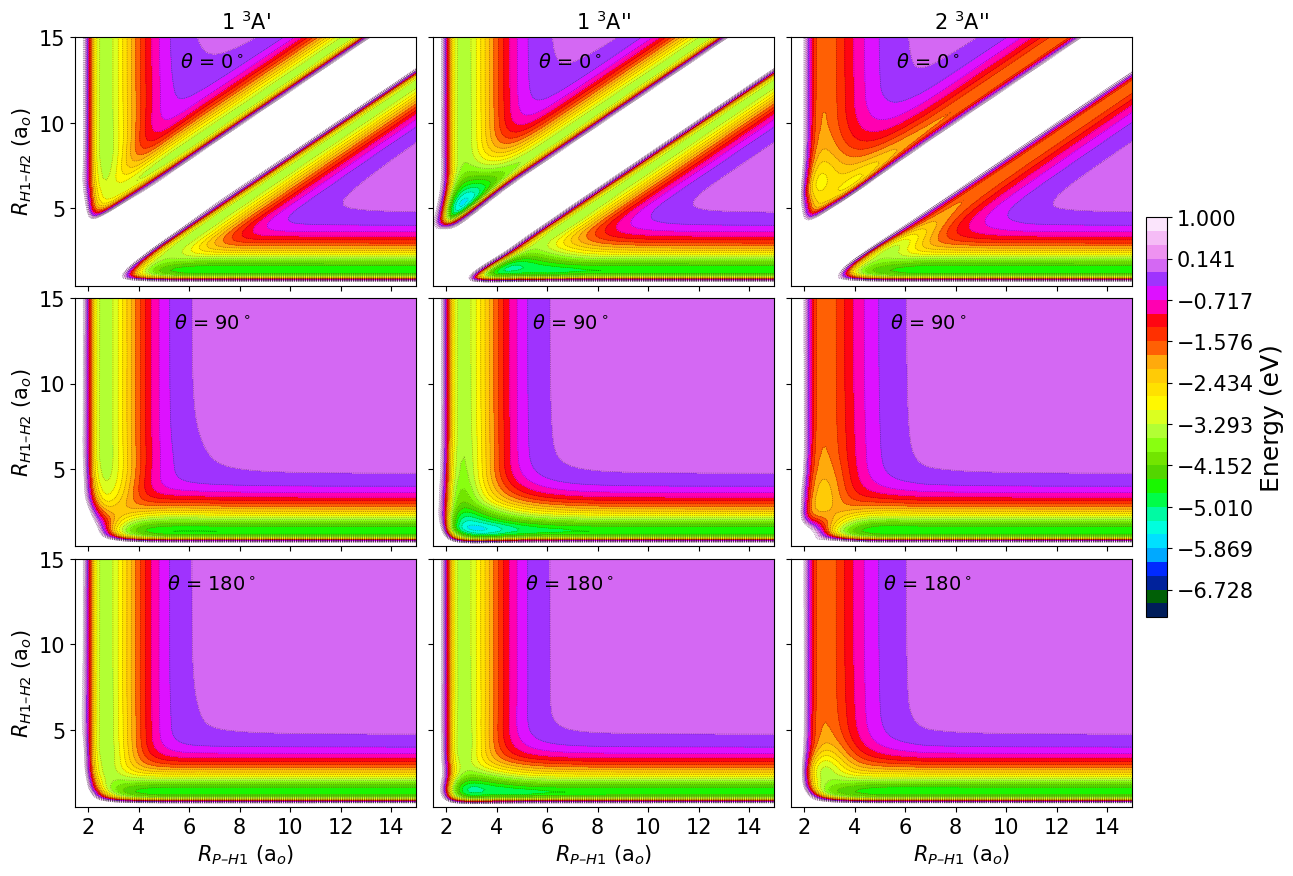

In [ ]:
r12_vals = np.linspace(1.5, 15, 100)
r23_vals = np.linspace(0.5, 15, 100)
R12, R23 = np.meshgrid(r12_vals, r23_vals)

# Parámetros
n_states = 3
theta_medio_deg = [90, 90, 90]  # Ángulo intermedio específico para cada estado
# theta_medio_deg = [45, 45, 45]  # Ángulo intermedio específico para cada estado
theta_list_deg = [
    [0,         theta_medio_deg[0], 180],
    [0,         theta_medio_deg[1], 180],
    [0,         theta_medio_deg[2], 180],
]
# theta_list_deg = [
#     [0,         theta_medio_deg[0], 90],
#     [0,         theta_medio_deg[1], 90],
#     [0,         theta_medio_deg[2], 90],
# ]


theta_list_rad = np.radians(theta_list_deg).T  # 3 filas (ángulos), n_states columnas

# Configuración de gráficos con espacio a la derecha para la colorbar
fig, axes = plt.subplots(n_states, 3, figsize=(14, 10), sharex='col', sharey='row',
                        gridspec_kw={'right': 0.88})
fig.subplots_adjust(hspace=0.05, wspace=0.05)

vmin, vmax = -7.3, 1.
levels = np.linspace(vmin, vmax, 30)
levels_cnt = np.linspace(vmin, vmax, 30)
cmap = plt.get_cmap('gist_ncar').copy()
norm = Normalize(vmin=vmin, vmax=vmax, clip=False)

cp_reference = None 
# Loop principal
for i_theta in range(3):          
    for j_state in range(n_states):
        ax = axes[i_theta, j_state]
        theta_rad = theta_list_rad[i_theta, j_state]

        E = np.zeros_like(R12)
        for i in range(R12.shape[0]):
            for j in range(R12.shape[1]):
                r12 = R12[i, j]
                r23 = R23[i, j]
                argumento = r12**2 + r23**2 - 2 * r12 * r23 * np.cos(theta_rad)
                if argumento <= 0:
                    E[i, j] = np.nan
                else:
                    r13 = np.sqrt(argumento)
                    if j_state == 0:
                        E[i, j] = energia1TAp(r12, r13, r23)*27.2114
                    elif j_state == 1:
                        E[i, j] = energia1TApp(r12, r13, r23)*27.2114
                    elif j_state == 2:
                        E[i, j] = energia2TApp(r12, r13, r23)*27.2114

        # Graficar
        # cp = ax.contourf(R12, R23, E, levels=levels, cmap=cmap, norm=norm, extend='max')
        cp = ax.contourf(R12, R23, E, levels=levels, cmap=cmap, norm=norm)
        ax.contour(R12, R23, E, levels=levels_cnt, colors='black', linewidths=0.5, linestyles=':', alpha=0.5)

        # Guardar mappable para la colorbar si es el subplot (1,2)
        if i_theta == 1 and j_state == 2:
            cp_reference = cp

        if j_state == 0:
            ax.annotate(r"$\theta$ = "+str(theta_list_deg[j_state][i_theta])+"$^\circ$", xy=(0.4, 0.9), xycoords='axes fraction', fontsize=14, color='black', ha='center', va='center')
            if i_theta == 0:
                ax.set_title(r"1 $^3$A'",fontsize=15,color="black")
        if j_state == 1:
            ax.annotate(r"$\theta$ = "+str(theta_list_deg[j_state][i_theta])+"$^\circ$", xy=(0.4, 0.9), xycoords='axes fraction', fontsize=14, color='black', ha='center', va='center')
            if i_theta == 0:
                ax.set_title(r"1 $^3$A''",fontsize=15,color="black")
        if j_state == 2:
            ax.annotate(r"$\theta$ = "+str(theta_list_deg[j_state][i_theta])+"$^\circ$", xy=(0.4, 0.9), xycoords='axes fraction', fontsize=14, color='black', ha='center', va='center')
            if i_theta == 0:
                ax.set_title(r"2 $^3$A''",fontsize=15,color="black")

        # Ejes limpios
        if i_theta == 2:
            ax.set_xlabel(r"$R_{P–H1}$ (a$_o$)", fontsize=15)
            ax.tick_params(axis='x', labelsize=15)
        if j_state == 0:
            ax.set_ylabel(r"$R_{H1–H2}$ (a$_o$)", fontsize=15)
            ax.tick_params(axis='y', labelsize=15)


# Colorbar externa a la derecha
if cp_reference is not None:
    cbar_ax = fig.add_axes([0.89, 0.3, 0.015, 0.4])  # [left, bottom, width, height]
    cbar = fig.colorbar(cp_reference, cax=cbar_ax)
    cbar.set_label('Energy (eV)', fontsize=18)
    cbar.ax.tick_params(labelsize=15)

plt.tight_layout()
# plt.savefig("1TApp_2TApp_1TAp.png", dpi=300, transparent=True)
# plt.savefig("1TApp_2TApp_1TAp.svg", dpi=300, transparent=True)
plt.show()


In [8]:
def get_ic(rg,rp,theta):
    thrad=np.radians(theta)
    r12=((rp*0.50)*(rp*0.50)+rg*rg-2.0*0.50*rp*rg*np.cos(thrad))**0.50
    r13=((rp*0.50)*(rp*0.50)+rg*rg-2.0*0.50*rp*rg*np.cos(np.pi-thrad))**0.50
    r23=rp
    return r12,r13,r23

def energia1TApp_JAC(rg,rp,theta):
    r_PH1, r_PH2, r_HH = get_ic(rg,rp,theta)

    e12,d12=diatphm(r_PH1)
    e13,d13=diatphm(r_PH2)
    e23,d23=diathh(r_HH)
    
    bod3,bodd3=fitGS.fit3d(r_PH1,r_PH2,r_HH)
    
    return bod3 + e12 + e13 + e23

def energia2TApp_JAC(rg,rp,theta):
    r_PH1, r_PH2, r_HH = get_ic(rg,rp,theta)
    if r_PH1 < 2.0:
        e12 = 0.309099*r_PH1**2.0-1.57688*r_PH1+1.95195
    else:
        e12,d12 = diat1qsm(r_PH1)
    if r_PH2 < 2.0:
        e13 = 0.309099*r_PH2**2.0-1.57688*r_PH2+1.95195
    else:
        e13,d13 = diat1qsm(r_PH2)
    if r_HH < 0.74:
        e23 = 1.33889*r_HH**2.0-2.92997*r_HH+1.47035
    else:
        e23,d23 = diathh(r_HH)
    bod3,bodd3=fit1QSm.fit3d(r_PH1,r_PH2,r_HH)
    return bod3 + e12 + e13 + e23

def energia1TAp_JAC(rg,rp,theta):
    r_PH1, r_PH2, r_HH = get_ic(rg,rp,theta)

    e12,d12=diatphm(r_PH1)
    e13,d13=diatphm(r_PH2)
    e23,d23=diathh(r_HH)

    bodd3=[0,0,0]
    bod3=fitpy10.fit3d(r_PH1,r_PH2,r_HH,bodd3)

    return bod3 + e12 + e13 + e23

def energia1SAp_JAC(rg,rp,theta):
    r_PH1, r_PH2, r_HH = get_ic(rg,rp,theta)
    if (r_PH1 < 2.0):
        e12=4.70442*np.exp(-0.948769*r_PH1**2)-0.135445
    else:
        e12,d12=diatphm(r_PH1)
    if (r_PH2 < 2.0):
        e13=4.70442*np.exp(-0.948769*r_PH2**2)-0.135445
    else:
        e13,d13=diatphm(r_PH2)
    if (r_HH < 0.74):
        e23=1.33889*r_HH**2 - 2.92997*r_HH + 1.47035
    else:
        e23,d23=diathh_sing(r_HH)

    # print(r_PH2,e13)
    bodd3=[0,0,0]
    bod3=fitpy81SAp.fit3d(r_PH1,r_PH2,r_HH,bodd3)
    # print(r_PH1,r_PH2,r_HH)
    return bod3 + e12 + e13 + e23

def energia1SApp_JAC(rg,rp,theta):
    r_PH1, r_PH2, r_HH = get_ic(rg,rp,theta)
    if (r_PH1 < 2.0):
        e12=4.70442*np.exp(-0.948769*r_PH1**2)-0.135445
    else:
        e12,d12=diatphm(r_PH1)
    if (r_PH2 < 2.0):
        e13=4.70442*np.exp(-0.948769*r_PH2**2)-0.135445
    else:
        e13,d13=diatphm(r_PH2)
    if (r_HH < 0.74):
        e23=1.33889*r_HH**2 - 2.92997*r_HH + 1.47035
    else:
        e23,d23=diathh_sing(r_HH)

    # print(r_PH2,e13)
    bodd3=[0,0,0]
    bod3=fitpy81SApp.fit3d(r_PH1,r_PH2,r_HH,bodd3)
    # print(r_PH1,r_PH2,r_HH)
    return bod3 + e12 + e13 + e23

<>:61: SyntaxWarning: invalid escape sequence '\c'
<>:65: SyntaxWarning: invalid escape sequence '\c'
<>:69: SyntaxWarning: invalid escape sequence '\c'
<>:61: SyntaxWarning: invalid escape sequence '\c'
<>:65: SyntaxWarning: invalid escape sequence '\c'
<>:69: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_222993/16319126.py:61: SyntaxWarning: invalid escape sequence '\c'
  ax.annotate(r"$\theta$ = "+str(theta_list_deg[j_state][i_theta])+"$^\circ$", xy=(0.8, 0.9), xycoords='axes fraction', fontsize=14, color='black', ha='center', va='center')
/tmp/ipykernel_222993/16319126.py:65: SyntaxWarning: invalid escape sequence '\c'
  ax.annotate(r"$\theta$ = "+str(theta_list_deg[j_state][i_theta])+"$^\circ$", xy=(0.8, 0.9), xycoords='axes fraction', fontsize=14, color='black', ha='center', va='center')
/tmp/ipykernel_222993/16319126.py:69: SyntaxWarning: invalid escape sequence '\c'
  ax.annotate(r"$\theta$ = "+str(theta_list_deg[j_state][i_theta])+"$^\circ$", xy=(0.8, 0.9), xycoor

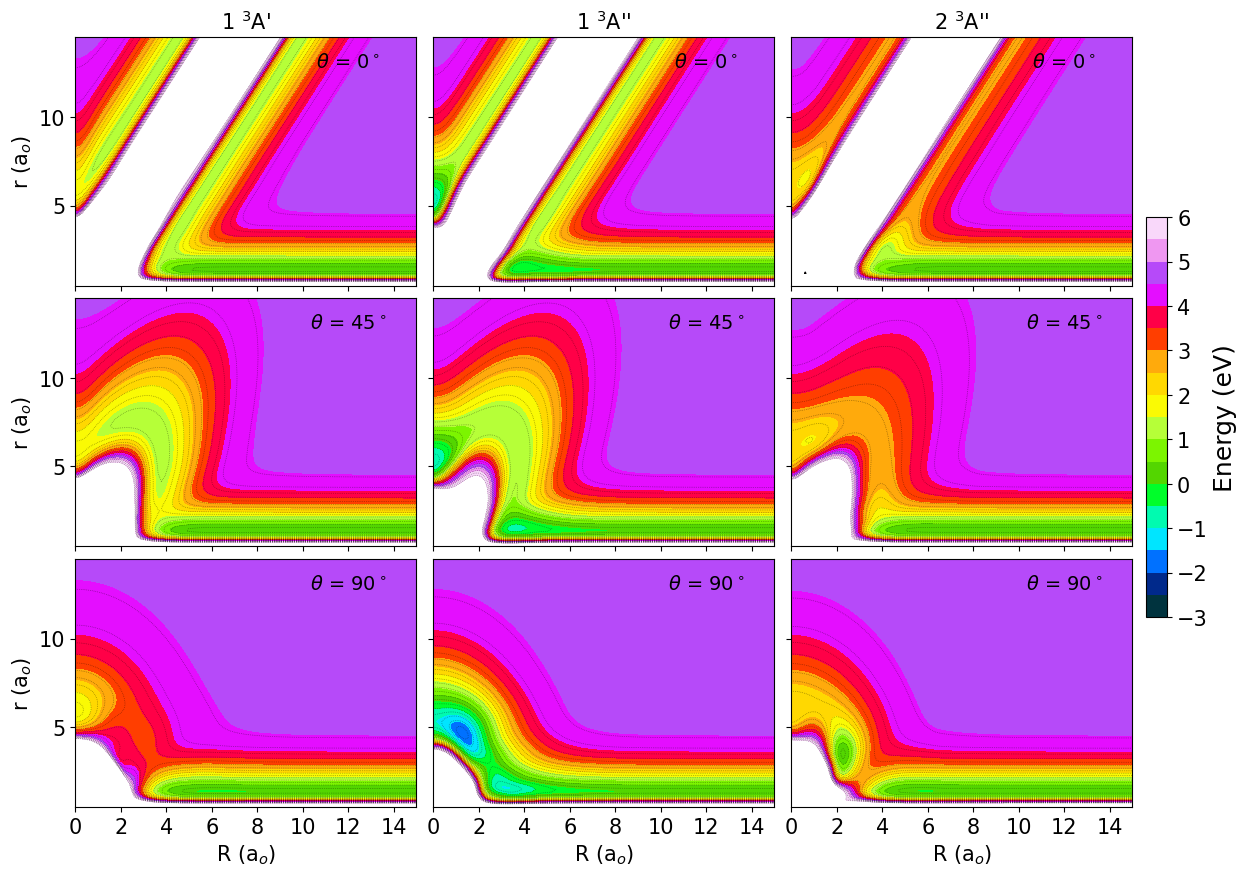

In [4]:
rg_vals = np.linspace(0, 15, 100)
rp_vals = np.linspace(0.5, 14.5, 100)
RG, RP = np.meshgrid(rg_vals, rp_vals)

# Parámetros
n_states = 3
theta_list_deg = [
    [0, 45, 90],
    [0, 45, 90],
    [0, 45, 90],
]

theta_list_rad = np.array(theta_list_deg).T  # 3 filas (ángulos), n_states columnas

# Configuración de gráficos con espacio a la derecha para la colorbar
fig2, axes2 = plt.subplots(n_states, 3, figsize=(14, 10), sharex='col', sharey='row',
                        gridspec_kw={'right': 0.88})
fig2.subplots_adjust(hspace=0.05, wspace=0.05)

vmin, vmax = -3.0, 6
levels = np.linspace(vmin, vmax, 30)
levels_cnt = np.linspace(vmin, vmax, 30)
levels = np.arange(vmin, vmax + 0.5, 0.5)
if 0 not in levels:
    levels = np.sort(np.append(levels, 0))
cmap = plt.get_cmap('gist_ncar').copy()
# cmap.set_over(cmap(0.9))
norm = Normalize(vmin=vmin, vmax=vmax, clip=False)

cp_reference = None 

# Loop principal
for i_theta in range(3):          
    for j_state in range(n_states):
        ax = axes2[i_theta,j_state]
        theta_rad = theta_list_rad[i_theta][j_state]

        E = np.zeros_like(RG)
        for i in range(RG.shape[0]):
            for j in range(RG.shape[1]):
                rg = RG[i, j]
                rp = RP[i, j]
                if j_state == 0:
                    E[i, j] = energia1TAp_JAC(rg,rp,theta_rad)*27.2114
                elif j_state == 1:
                    E[i, j] = energia1TApp_JAC(rg,rp,theta_rad)*27.2114
                elif j_state == 2:
                    E[i, j] = energia2TApp_JAC(rg,rp,theta_rad)*27.2114

        # Graficar
        # cp = ax.contourf(RG, RP, E, levels=levels, cmap=cmap, norm=norm, extend='max')
        E = E+0.1726190452588769*27.2114
        cp = ax.contourf(RG, RP, E, levels=levels, cmap=cmap, norm=norm)
        ax.contour(RG, RP, E, levels=levels_cnt, colors='black', linewidths=0.5, linestyles=':', alpha=0.5)

        # Guardar mappable para la colorbar si es el subplot (1,2)
        if i_theta == 1 and j_state == 2:
            cp_reference = cp

        if j_state == 0:
            ax.annotate(r"$\theta$ = "+str(theta_list_deg[j_state][i_theta])+"$^\circ$", xy=(0.8, 0.9), xycoords='axes fraction', fontsize=14, color='black', ha='center', va='center')
            if i_theta == 0:
                ax.set_title(r"1 $^3$A'",fontsize=15,color="black")
        if j_state == 1:
            ax.annotate(r"$\theta$ = "+str(theta_list_deg[j_state][i_theta])+"$^\circ$", xy=(0.8, 0.9), xycoords='axes fraction', fontsize=14, color='black', ha='center', va='center')
            if i_theta == 0:
                ax.set_title(r"1 $^3$A''",fontsize=15,color="black")
        if j_state == 2:
            ax.annotate(r"$\theta$ = "+str(theta_list_deg[j_state][i_theta])+"$^\circ$", xy=(0.8, 0.9), xycoords='axes fraction', fontsize=14, color='black', ha='center', va='center')
            if i_theta == 0:
                ax.set_title(r"2 $^3$A''",fontsize=15,color="black")

        # Ejes limpios
        if i_theta == 2:
            ax.set_xlabel(r"R (a$_o$)", fontsize=15)
            ax.tick_params(axis='x', labelsize=15)
        if j_state == 0:
            ax.set_ylabel(r"r (a$_o$)", fontsize=15)
            ax.tick_params(axis='y', labelsize=15)


# Colorbar externa a la derecha
if cp_reference is not None:
    cbar_ax = fig2.add_axes([0.89, 0.3, 0.015, 0.4])  # [left, bottom, width, height]
    cbar = fig2.colorbar(cp_reference, cax=cbar_ax)
    cbar.set_label('Energy (eV)', fontsize=18)
    cbar.ax.tick_params(labelsize=15)

plt.tight_layout()
plt.savefig("1TApp_2TApp_1TAp.png", dpi=300, transparent=True)
plt.savefig("1TApp_2TApp_1TAp.svg", dpi=300, transparent=True)
plt.show()

<>:59: SyntaxWarning: invalid escape sequence '\c'
<>:63: SyntaxWarning: invalid escape sequence '\c'
<>:59: SyntaxWarning: invalid escape sequence '\c'
<>:63: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_222993/1146340504.py:59: SyntaxWarning: invalid escape sequence '\c'
  ax.annotate(r"$\theta$ = "+str(theta_list_deg[j_state][i_theta])+"$^\circ$", xy=(0.8, 0.9), xycoords='axes fraction', fontsize=14, color='black', ha='center', va='center')
/tmp/ipykernel_222993/1146340504.py:63: SyntaxWarning: invalid escape sequence '\c'
  ax.annotate(r"$\theta$ = "+str(theta_list_deg[j_state][i_theta])+"$^\circ$", xy=(0.8, 0.9), xycoords='axes fraction', fontsize=14, color='black', ha='center', va='center')
/tmp/ipykernel_222993/1146340504.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


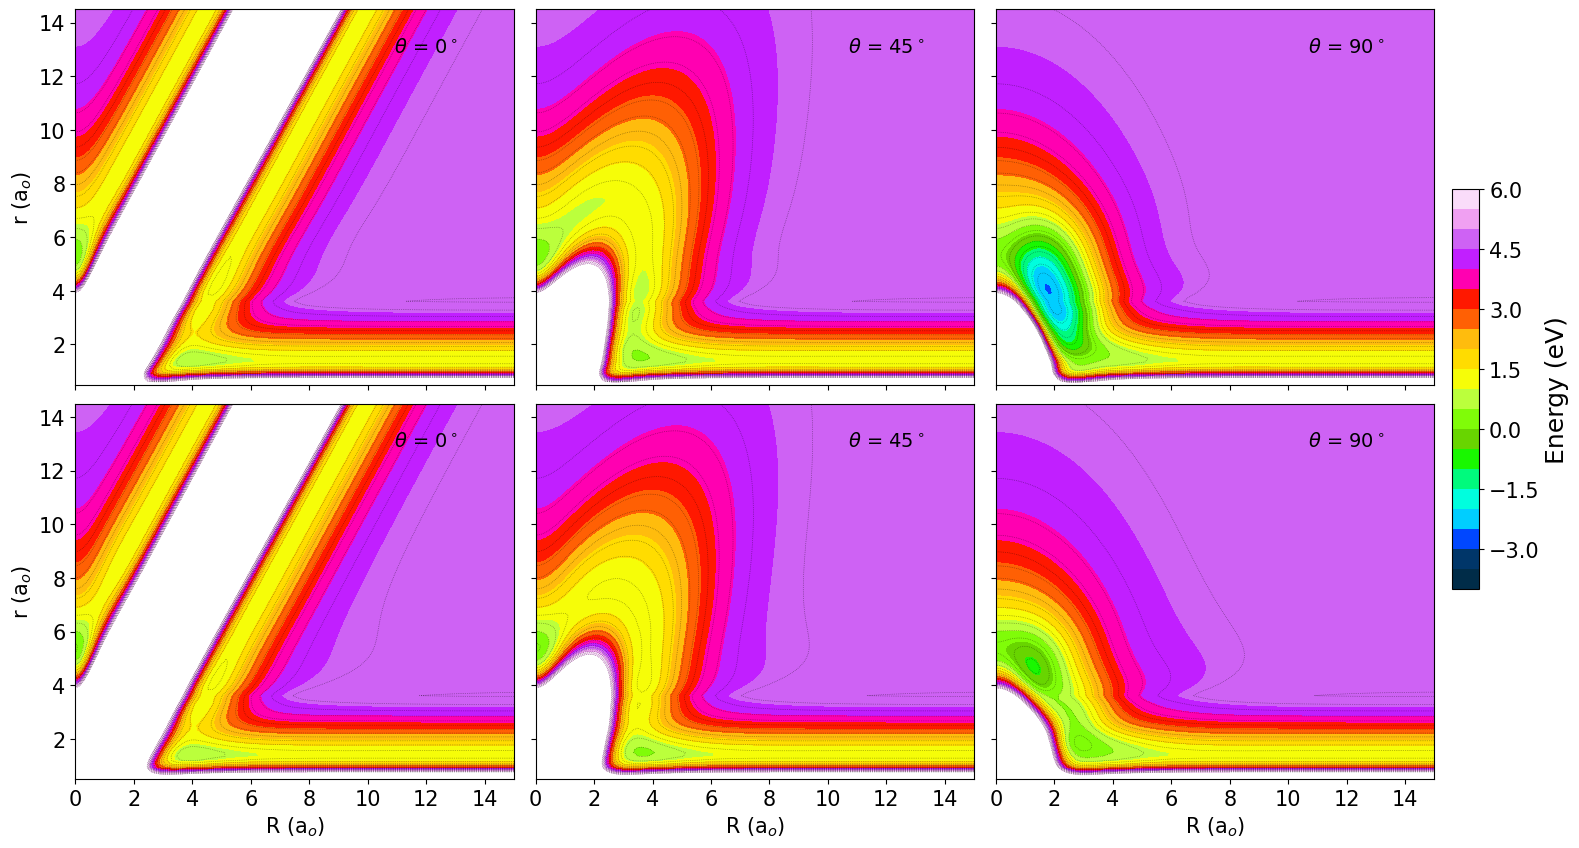

In [5]:
rg_vals = np.linspace(0, 15, 100)
rp_vals = np.linspace(0.5, 14.5, 100)
RG, RP = np.meshgrid(rg_vals, rp_vals)

# Parámetros
n_states = 2
theta_list_deg = [
    [0, 45, 90],
    [0, 45, 90],
    # [0, 45, 90],
]

theta_list_rad = np.array(theta_list_deg) # 3 filas (ángulos), n_states columnas

# Configuración de gráficos con espacio a la derecha para la colorbar
fig4, axes4 = plt.subplots(n_states, 3, figsize=(18, 10), sharex='col', sharey='row',
                        gridspec_kw={'right': 0.88})
fig4.subplots_adjust(hspace=0.05, wspace=0.05)

vmin, vmax = -4.0, 6
levels = np.linspace(vmin, vmax, 30)
levels_cnt = np.linspace(vmin, vmax, 30)
levels = np.arange(vmin, vmax + 0.5, 0.5)
if 0 not in levels:
    levels = np.sort(np.append(levels, 0))
cmap = plt.get_cmap('gist_ncar').copy()
# cmap.set_over(cmap(0.9))
norm = Normalize(vmin=vmin, vmax=vmax, clip=False)

cp_reference = None 

# Loop principal
for i_theta in range(3):          
    for j_state in range(n_states):
        ax = axes4[j_state,i_theta]
        theta_rad = theta_list_rad[j_state][i_theta]

        E = np.zeros_like(RG)
        for i in range(RG.shape[0]):
            for j in range(RG.shape[1]):
                rg = RG[i, j]
                rp = RP[i, j]
                if j_state == 0:
                    E[i, j] = energia1SAp_JAC(rg,rp,theta_rad)*27.2114
                elif j_state == 1:
                    E[i, j] = energia1SApp_JAC(rg,rp,theta_rad)*27.2114

        # Graficar
        # cp = ax.contourf(RG, RP, E, levels=levels, cmap=cmap, norm=norm, extend='max')
        E = E+0.1726190452588769*27.2114
        cp = ax.contourf(RG, RP, E, levels=levels, cmap=cmap, norm=norm)
        ax.contour(RG, RP, E, levels=levels_cnt, colors='black', linewidths=0.5, linestyles=':', alpha=0.5)

        # Guardar mappable para la colorbar si es el subplot (1,2)
        if i_theta == 2 and j_state == 0:
            cp_reference = cp

        if j_state == 0:
            ax.annotate(r"$\theta$ = "+str(theta_list_deg[j_state][i_theta])+"$^\circ$", xy=(0.8, 0.9), xycoords='axes fraction', fontsize=14, color='black', ha='center', va='center')
            # if i_theta == 0:
            #     ax.set_title(r"1 $^1$A'",fontsize=15,color="black")
        if j_state == 1:
            ax.annotate(r"$\theta$ = "+str(theta_list_deg[j_state][i_theta])+"$^\circ$", xy=(0.8, 0.9), xycoords='axes fraction', fontsize=14, color='black', ha='center', va='center')
            # if i_theta == 0:
            #     ax.set_title(r"1 $^1$A''",fontsize=15,color="black")

        # Ejes limpios
        if j_state == 1:
            ax.set_xlabel(r"R (a$_o$)", fontsize=15)
            ax.tick_params(axis='x', labelsize=15)
        if i_theta == 0:
            ax.set_ylabel(r"r (a$_o$)", fontsize=15)
            ax.tick_params(axis='y', labelsize=15)


# Colorbar externa a la derecha
if cp_reference is not None:
    cbar_ax = fig4.add_axes([0.89, 0.3, 0.015, 0.4])  # [left, bottom, width, height]
    cbar = fig4.colorbar(cp_reference, cax=cbar_ax)
    cbar.set_label('Energy (eV)', fontsize=18)
    cbar.ax.tick_params(labelsize=15)

plt.tight_layout()
plt.savefig("1SAp_1SApp.png", dpi=300, transparent=True)
plt.savefig("1SApp_1SApp.svg", dpi=300, transparent=True)
plt.show()

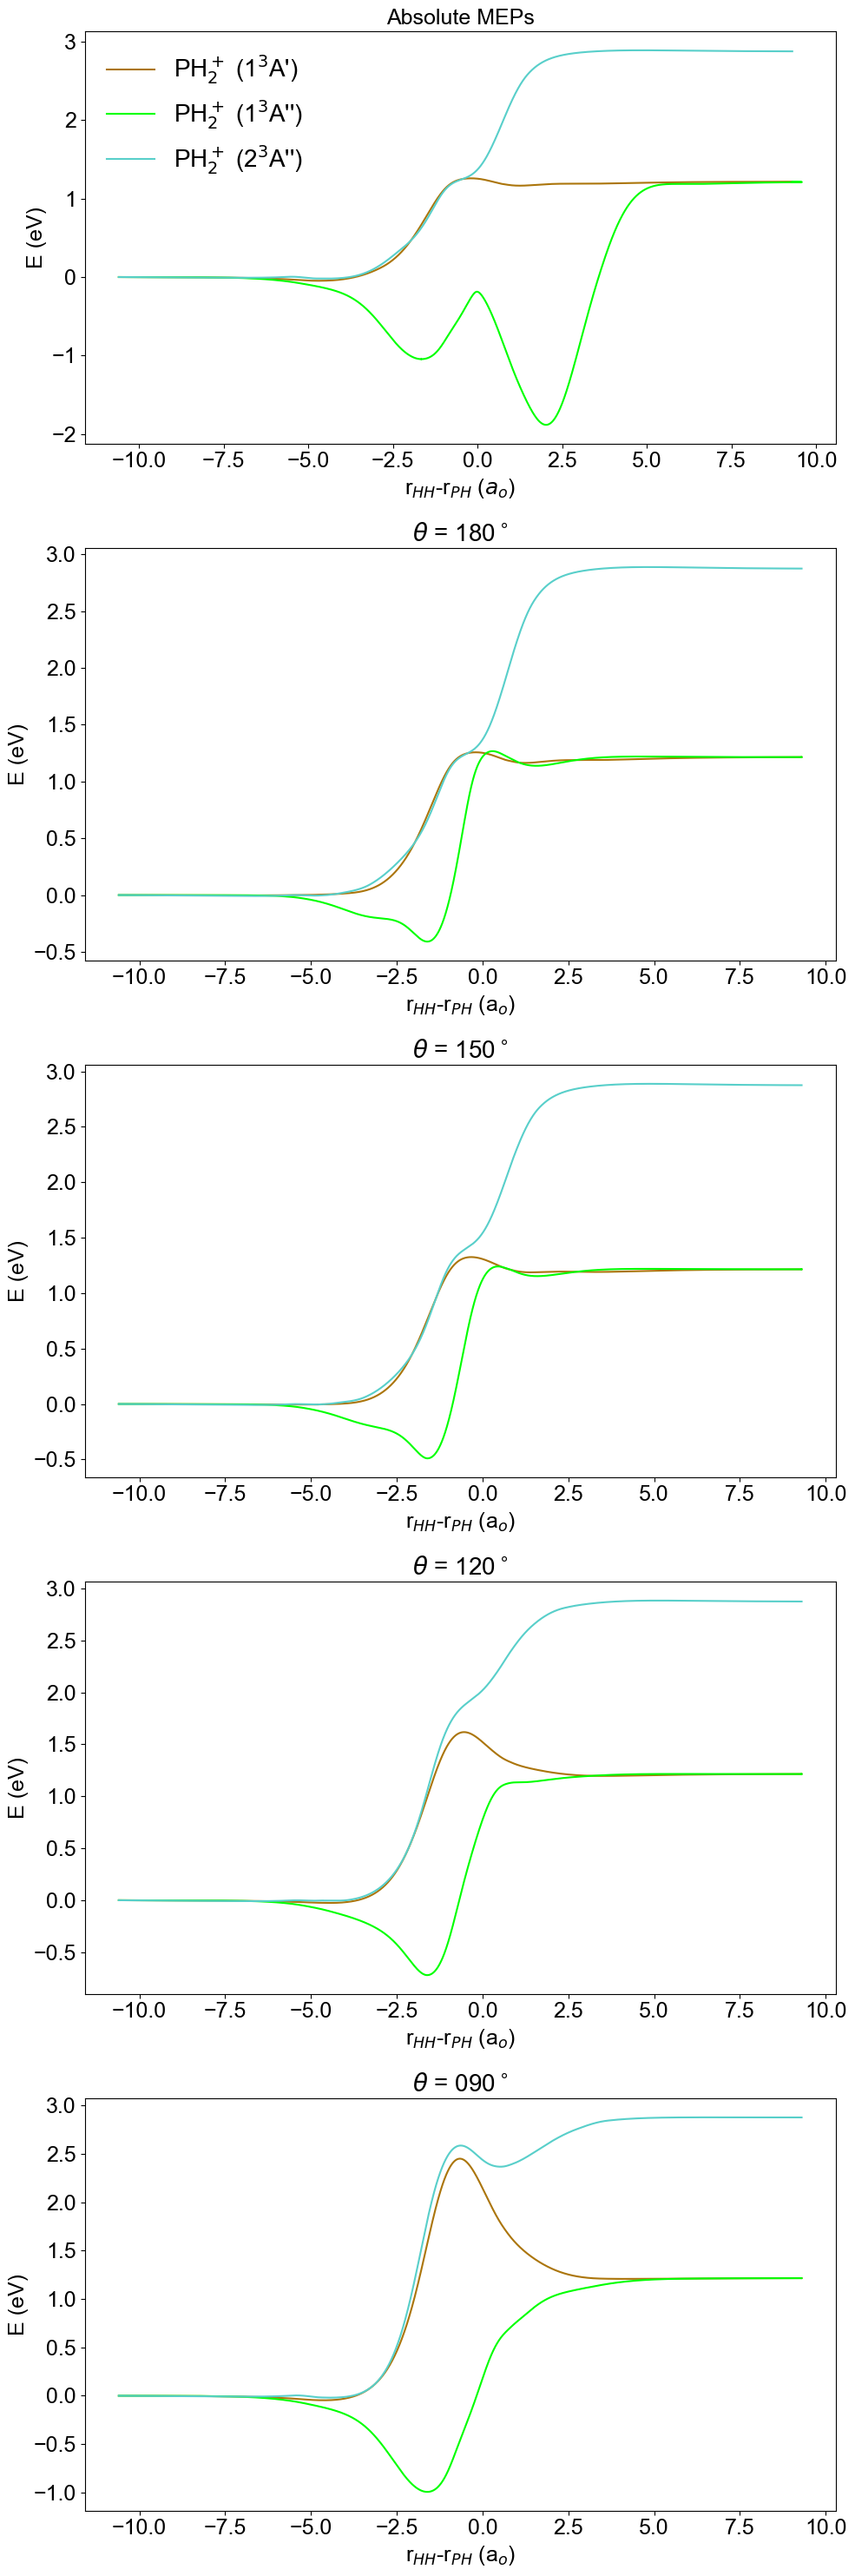

In [28]:
mep_1TAp = np.loadtxt("1TAp.dat", skiprows=1)
mep_1TApp = np.loadtxt("1TApp.dat", skiprows=1)
mep_2TApp = np.loadtxt("2TApp.dat", skiprows=1)

states = ["1TAp", "1TApp", "2TApp"]
angles = list(range(0, 100, 10))
angles = [0, 30, 60, 90]
ntheta = len(angles)+1
mep_states_angles = {}
for state in states:
    mep_states_angles[state] = {}
    for angle in angles:
        mep_state_angle = np.loadtxt(f"{state}_{angle:03}.dat", skiprows=1)
        mep_states_angles[state][angle] = mep_state_angle

plt.rcParams['font.family'] = 'sans-serif' # O 'serif', 'monospace', etc.
plt.rcParams['font.sans-serif'] = ['Arial'] # Reemplaza Arial por la fuente que quieras
plt.rcParams['font.size'] = 18
tot = 100
colors = [
    (67.1/tot, 45.9/tot, 4.3/tot), # 1TAp
    (0.0/tot, 100.0/tot, 0.0/tot), # 1TApp
    (34.5/tot, 81.2/tot, 79.2/tot) # 2TApp
]

# fig10, ax10 = plt.subplots(3,1,figsize=(10,10))

fig12, ax12 = plt.subplots(ntheta,1,figsize=(10,30))

ax12[0].plot((mep_1TAp[:,2]-mep_1TAp[:,0]), (mep_1TAp[:,3]-mep_1TAp[0,3])*27.2114, color = colors[0], label=r"PH$_2^+$ (1$^3$A')")
ax12[0].plot((mep_1TApp[:,2]-mep_1TApp[:,0]), (mep_1TApp[:,3]-mep_1TApp[0,3])*27.2114, color = colors[1], label=r"PH$_2^+$ (1$^3$A'')")
ax12[0].plot((mep_2TApp[:,2]-mep_2TApp[:,0]), (mep_2TApp[:,3]-mep_2TApp[0,3])*27.2114, color = colors[2], label=r"PH$_2^+$ (2$^3$A'')")

ax12[0].set_title("Absolute MEPs", fontsize=18)
ax12[0].set_ylabel("E (eV)", fontsize=18)
ax12[0].set_xlabel(r"r$_{HH}$-r$_{PH}$ ($a_o$)",fontsize=18)

for i, angle in enumerate(angles):
    ax12[i+1].plot((mep_states_angles["1TAp"][angle][:,2]-mep_states_angles["1TAp"][angle][:,0]), (mep_states_angles["1TAp"][angle][:,3]-mep_states_angles["1TAp"][angle][0,3])*27.2114, color = colors[0], label="1TAp")
    ax12[i+1].plot((mep_states_angles["1TApp"][angle][:,2]-mep_states_angles["1TApp"][angle][:,0]), (mep_states_angles["1TApp"][angle][:,3]-mep_states_angles["1TApp"][angle][0,3])*27.2114, color = colors[1], label="1TApp")
    ax12[i+1].plot((mep_states_angles["2TApp"][angle][:,2]-mep_states_angles["2TApp"][angle][:,0]), (mep_states_angles["2TApp"][angle][:,3]-mep_states_angles["2TApp"][angle][0,3])*27.2114, color = colors[2], label="2TApp")

    ax12[i+1].set_ylabel("E (eV)", fontsize=18)
    ax12[i+1].set_xlabel(r"r$_{HH}$-r$_{PH}$ (a$_o$)",fontsize=18)

    # ax12[i+1].legend(frameon=False,fontsize=20)
    ang = 180 - angle
    ax12[i+1].set_title(r"$\theta$ = {:03}$^\circ$".format(ang),fontsize=20)

ax12[0].legend(frameon=False,fontsize=20)
fig12.tight_layout()
fig12.savefig("MEPs_triplets.png",dpi=300,transparent=True)
# fig12.savefig("MEPs_triplets.svg",dpi=300,transparent=True)b

1


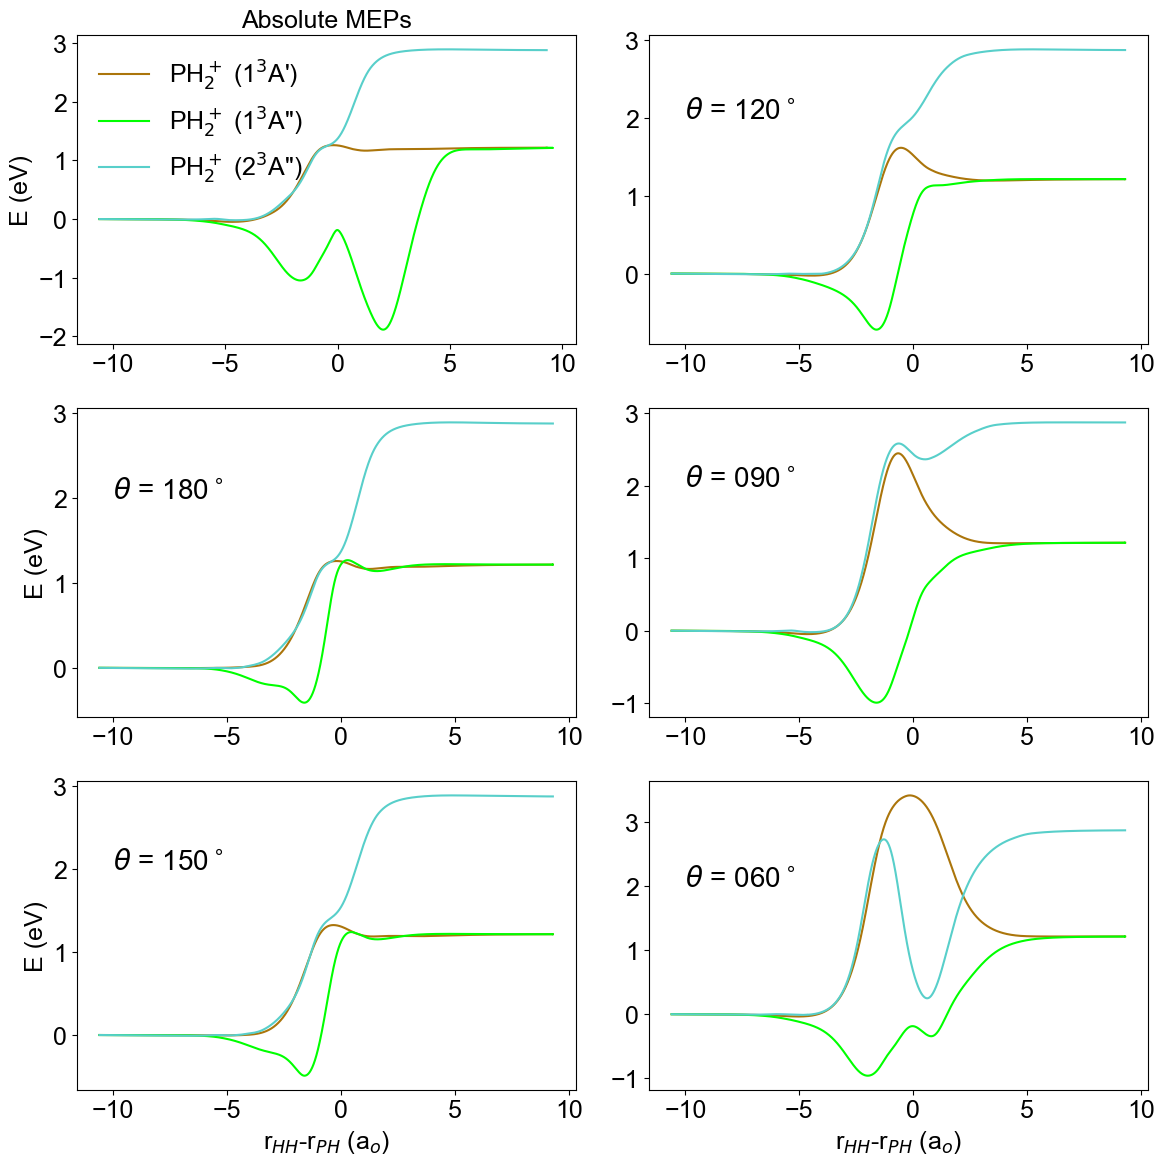

In [27]:
mep_1TAp = np.loadtxt("1TAp.dat", skiprows=1)
mep_1TApp = np.loadtxt("1TApp.dat", skiprows=1)
mep_2TApp = np.loadtxt("2TApp.dat", skiprows=1)

states = ["1TAp", "1TApp", "2TApp"]
angles = list(range(0, 100, 10))
angles = [0, 30, 60, 90, 120]
ntheta = len(angles)+1
mep_states_angles = {}
for state in states:
    mep_states_angles[state] = {}
    for angle in angles:
        mep_state_angle = np.loadtxt(f"{state}_{angle:03}.dat", skiprows=1)
        mep_states_angles[state][angle] = mep_state_angle

plt.rcParams['font.family'] = 'sans-serif' # O 'serif', 'monospace', etc.
plt.rcParams['font.sans-serif'] = ['Arial'] # Reemplaza Arial por la fuente que quieras
plt.rcParams['font.size'] = 18
tot = 100
colors = [
    (67.1/tot, 45.9/tot, 4.3/tot), # 1TAp
    (0.0/tot, 100.0/tot, 0.0/tot), # 1TApp
    (34.5/tot, 81.2/tot, 79.2/tot) # 2TApp
]

# fig10, ax10 = plt.subplots(3,1,figsize=(10,10))
ncols = ntheta%2+1
print(ncols)
fig12, ax12 = plt.subplots(3,2,figsize=(12,12))

ax12[0,0].plot((mep_1TAp[:,2]-mep_1TAp[:,0]), (mep_1TAp[:,3]-mep_1TAp[0,3])*27.2114, color = colors[0], label=r"PH$_2^+$ (1$^3$A')")
ax12[0,0].plot((mep_1TApp[:,2]-mep_1TApp[:,0]), (mep_1TApp[:,3]-mep_1TApp[0,3])*27.2114, color = colors[1], label=r"PH$_2^+$ (1$^3$A'')")
ax12[0,0].plot((mep_2TApp[:,2]-mep_2TApp[:,0]), (mep_2TApp[:,3]-mep_2TApp[0,3])*27.2114, color = colors[2], label=r"PH$_2^+$ (2$^3$A'')")

ax12[0,0].set_title("Absolute MEPs", fontsize=18)
ax12[0,0].set_ylabel("E (eV)", fontsize=18)
# ax12[0,0].set_xlabel(r"r$_{HH}$-r$_{PH}$ ($a_o$)",fontsize=18)

nr=0
for angle in angles:
    if angle == 0 or angle == 30:
        nr += 1 
        nc = 0
    elif angle == 60:
        nr = 0 
        nc = 1
    else:
        nr += 1 
        nc = 1
    ax12[nr,nc].plot((mep_states_angles["1TAp"][angle][:,2]-mep_states_angles["1TAp"][angle][:,0]), (mep_states_angles["1TAp"][angle][:,3]-mep_states_angles["1TAp"][angle][0,3])*27.2114, color = colors[0], label="1TAp")
    ax12[nr,nc].plot((mep_states_angles["1TApp"][angle][:,2]-mep_states_angles["1TApp"][angle][:,0]), (mep_states_angles["1TApp"][angle][:,3]-mep_states_angles["1TApp"][angle][0,3])*27.2114, color = colors[1], label="1TApp")
    ax12[nr,nc].plot((mep_states_angles["2TApp"][angle][:,2]-mep_states_angles["2TApp"][angle][:,0]), (mep_states_angles["2TApp"][angle][:,3]-mep_states_angles["2TApp"][angle][0,3])*27.2114, color = colors[2], label="2TApp")

    if nc == 0:
        ax12[nr,nc].set_ylabel("E (eV)", fontsize=18)
    if nr == 2:
        ax12[nr,nc].set_xlabel(r"r$_{HH}$-r$_{PH}$ (a$_o$)",fontsize=18)

    # ax12[nr,nc].legend(frameon=False,fontsize=20)
    ang = 180 - angle
    ax12[nr,nc].annotate(r"$\theta$ = {:03}$^\circ$".format(ang),xy=(-10,2),fontsize=20)
    # ax12[nr,nc].set_title(r"$\theta$ = {:03}$^\circ$".format(ang),fontsize=20)

ax12[0,0].legend(frameon=False,fontsize=18)
fig12.tight_layout()
fig12.savefig("MEPs_trip_2cols.png",dpi=300,transparent=True)
# fig12.savefig("MEPs_triplets.svg",dpi=300,transparent=True)b

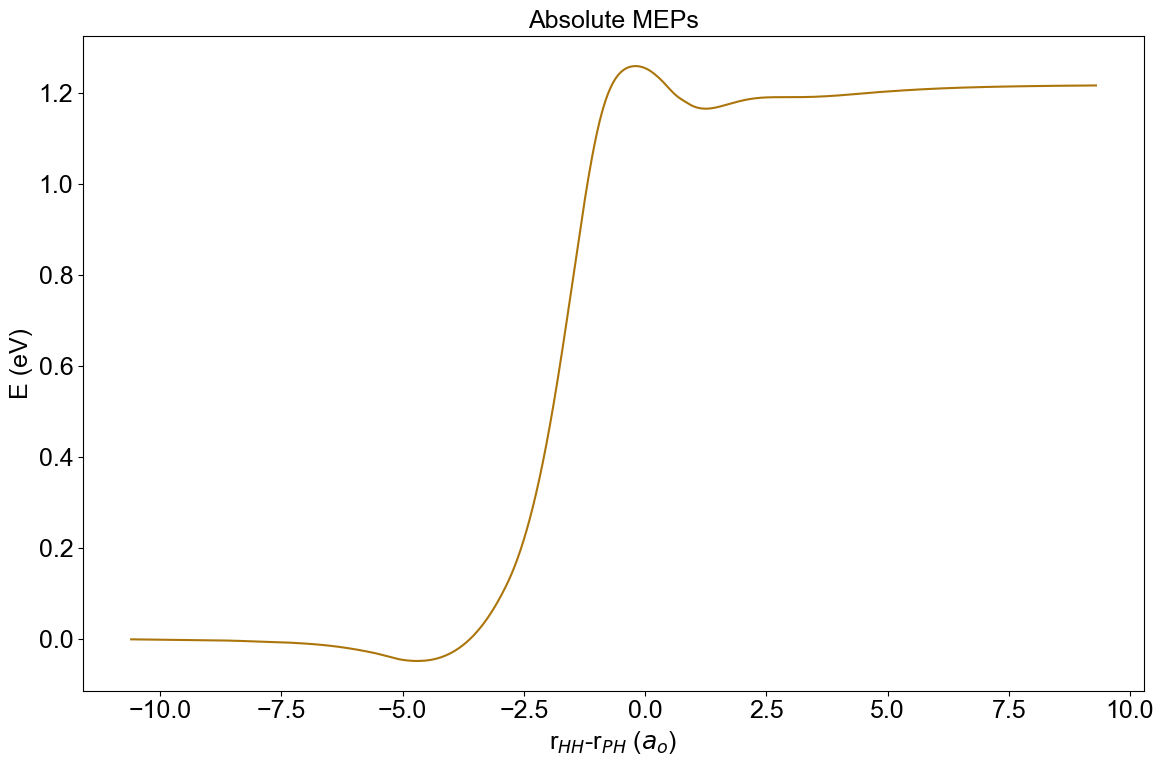

In [ ]:
mep_1TAp = np.loadtxt("1TAp.dat", skiprows=1)
mep_1TApp = np.loadtxt("1TApp.dat", skiprows=1)
mep_2TApp = np.loadtxt("2TApp.dat", skiprows=1)

fig19, ax19 = plt.subplots(figsize=(12,8))

ax19.plot((mep_1TAp[:,2]-mep_1TAp[:,0]), (mep_1TAp[:,3]-mep_1TAp[0,3])*27.2114, color = colors[0])
# ax19.plot((mep_1TApp[:,2]-mep_1TApp[:,0]), (mep_1TApp[:,3]-mep_1TApp[0,3])*27.2114, color = colors[1])
# ax19.plot((mep_2TApp[:,2]-mep_2TApp[:,0]), (mep_2TApp[:,3]-mep_2TApp[0,3])*27.2114, color = colors[2])

ax19.set_title("Absolute MEPs", fontsize=18)
ax19.set_ylabel("E (eV)", fontsize=18)
ax19.set_xlabel(r"r$_{HH}$-r$_{PH}$ ($a_o$)",fontsize=18)

fig19.tight_layout()
fig19.savefig("MEP_1TAp.png",dpi=300,transparent=True)
# fig19.savefig("MEPs_triplets.svg",dpi=300,transparent=True)b

19


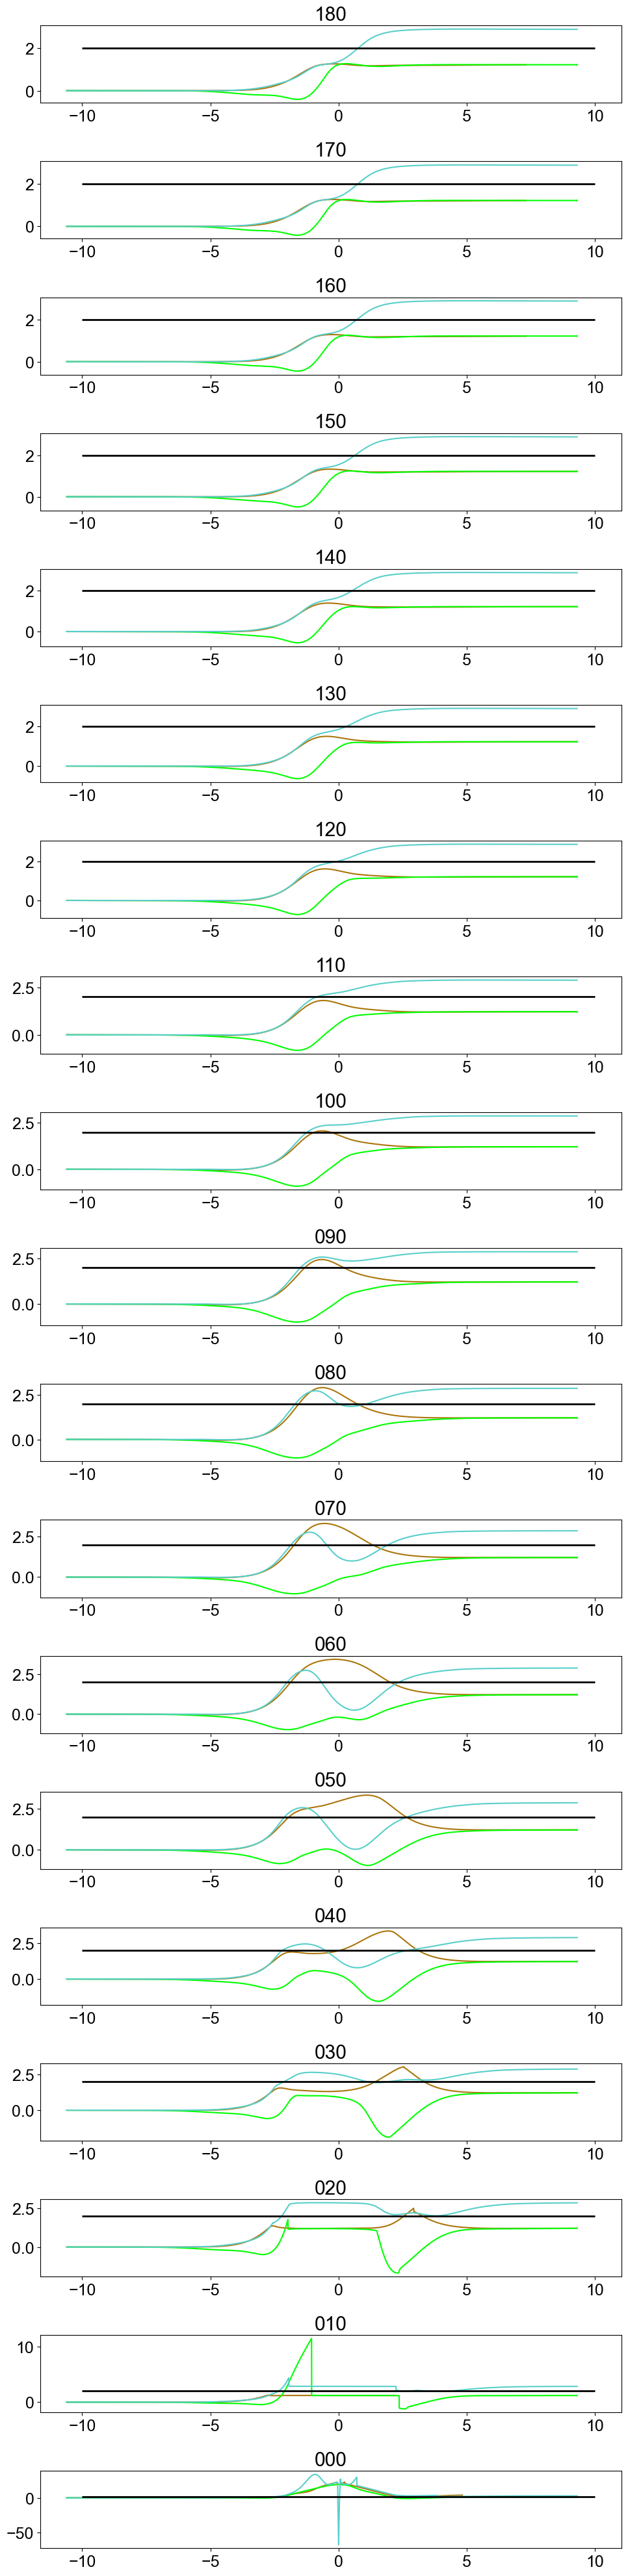

In [ ]:
mep_1TAp = np.loadtxt("1TAp.dat", skiprows=1)
mep_1TApp = np.loadtxt("1TApp.dat", skiprows=1)
mep_2TApp = np.loadtxt("2TApp.dat", skiprows=1)

states = ["1TAp", "1TApp", "2TApp"]
angles = list(range(0, 190, 10))
print(len(angles))
mep_states_angles = {}
for state in states:
    mep_states_angles[state] = {}
    for angle in angles:
        mep_state_angle = np.loadtxt(f"{state}_{angle:03}.dat", skiprows=1)
        mep_states_angles[state][angle] = mep_state_angle

plt.rcParams['font.family'] = 'sans-serif' # O 'serif', 'monospace', etc.
plt.rcParams['font.sans-serif'] = ['Arial'] # Reemplaza Arial por la fuente que quieras
plt.rcParams['font.size'] = 18
tot = 100
colors = [
    (67.1/tot, 45.9/tot, 4.3/tot), # 1TAp
    (0.0/tot, 100.0/tot, 0.0/tot), # 1TApp
    (34.5/tot, 81.2/tot, 79.2/tot) # 2TApp
]

# fig10, ax10 = plt.subplots(3,1,figsize=(10,10))

# print(colors[0])
# ax10[0].plot((mep_1TAp[:,2]-mep_1TAp[:,0]), (mep_1TAp[:,3]-mep_1TAp[0,3])*27.2114, color = colors[0])
# ax10[1].plot((mep_1TApp[:,2]-mep_1TApp[:,0]), (mep_1TApp[:,3]-mep_1TApp[0,3])*27.2114, color = colors[1])ax10[0].plot((mep_1TAp[:,2]-mep_1TAp[:,0]), (mep_1TAp[:,3]-mep_1TAp[0,3])*27.2114, color = colors[0])
ax10[1].plot((mep_1TApp[:,2]-mep_1TApp[:,0]), (mep_1TApp[:,3]-mep_1TApp[0,3])*27.2114, color = colors[1])

# ax10[2].plot((mep_2TApp[:,2]-mep_2TApp[:,0]), (mep_2TApp[:,3]-mep_2TApp[0,3])*27.2114, color = colors[2])

ntheta = 19

fig15, ax15 = plt.subplots(ntheta,1,figsize=(10,40))

for i, angle in enumerate(angles):
    ax15[i].plot((mep_states_angles["1TAp"][angle][:,2]-mep_states_angles["1TAp"][angle][:,0]), (mep_states_angles["1TAp"][angle][:,3]-mep_states_angles["1TAp"][angle][0,3])*27.2114, color = colors[0], label="1TAp")
    ax15[i].plot((mep_states_angles["1TApp"][angle][:,2]-mep_states_angles["1TApp"][angle][:,0]), (mep_states_angles["1TApp"][angle][:,3]-mep_states_angles["1TApp"][angle][0,3])*27.2114, color = colors[1], label="1TApp")
    ax15[i].plot((mep_states_angles["2TApp"][angle][:,2]-mep_states_angles["2TApp"][angle][:,0]), (mep_states_angles["2TApp"][angle][:,3]-mep_states_angles["2TApp"][angle][0,3])*27.2114, color = colors[2], label="2TApp")

    ax15[i].hlines(2,-10,10,lw=2,color="black")
    # ax15[i].legend()
    ang = 180 - angle
    ax15[i].set_title("{:03}".format(ang))

fig15.tight_layout()
fig15.savefig("MEPs_triplets.png",dpi=300,transparent=True)
# fig15.savefig("MEPs_triplets.svg",dpi=300,transparent=True)

In [ ]:
import scipy
from scipy.signal import find_peaks

def get_derivatives_np(x, y):
    """
    Compute the derivative of a function y(x) at points x using numpy
    """
    derivatives = np.gradient(y, x)
    return derivatives

x1 = mep_1TAp[:,2]-mep_1TAp[:,0]
y1 = (mep_1TAp[:,3]-mep_1TAp[0,3])*27.2114

d1 = get_derivatives_np(x1, y1)
sd1 = get_derivatives_np(x1, d1)

x2 = mep_1TApp[:,2]-mep_1TApp[:,0]
y2 = (mep_1TApp[:,3]-mep_1TApp[0,3])*27.2114

d2 = get_derivatives_np(x2, y2)
sd2 = get_derivatives_np(x2, d2)

x3 = mep_2TApp[:,2]-mep_2TApp[:,0]
y3 = (mep_2TApp[:,3]-mep_2TApp[0,3])*27.2114

d3 = get_derivatives_np(x3, y3)
sd3 = get_derivatives_np(x3, d3)

max_1tap_ind, _ = find_peaks(y1)
min_1tap_ind, _ = find_peaks(-y1)

# for i in max_1tap_ind:
#     print(mep_1TAp[i,:3],(mep_1TAp[i,3]-mep_1TAp[0,3])*27.2114)
# for j in min_1tap_ind:
#     print(mep_1TAp[j,:3],(mep_1TAp[j,3]-mep_1TAp[0,3])*27.2114)

max_1tapp_ind, _ = find_peaks(y2)
min_1tapp_ind, _ = find_peaks(-y2)

# for i in max_1tapp_ind:
#     print(mep_1TApp[i,:3],(mep_1TApp[i,3]-mep_1TApp[0,3])*27.2114)
# for j in min_1tapp_ind:
#     print(mep_1TApp[j,:3],(mep_1TApp[j,3]-mep_1TApp[0,3])*27.2114)

mask = (x2 > -1.5) & (x2 < 1.1)
y2m = y2[mask]
for i in y2m:
    print(i)

print(np.argmax(y2[mask]))
print(max(y2m))
print(x2[19570])

# min_1tapp_ind = np.argmin(sd2[mask])
# print(x2[mask],mep_1TApp[min_1tapp_ind,:3],(mep_1TApp[min_1tapp_ind,3]-mep_1TApp[0,3])*27.2114)
max_1tapp_ind = np.argmax(mep_1TApp[mask])
# print(mep_1TApp[max_1tapp_ind,:3],(mep_1TApp[max_1tapp_ind,3]-mep_1TApp[0,3])*27.2114)

print(mep_1TAp[0,3])

In [22]:
zeroas=mep_1TAp[0,3]
print(zeroas)
elim = -341.4415119944000025
ic1 = ((-341.61578-elim)-zeroas)*27.2114
ic2 = ((-341.565269-elim)-zeroas)*27.2114
print(ic1,ic2)


-0.17452268699994591
0.006930237447307018 1.381405262846539


#### Get Stt Pts

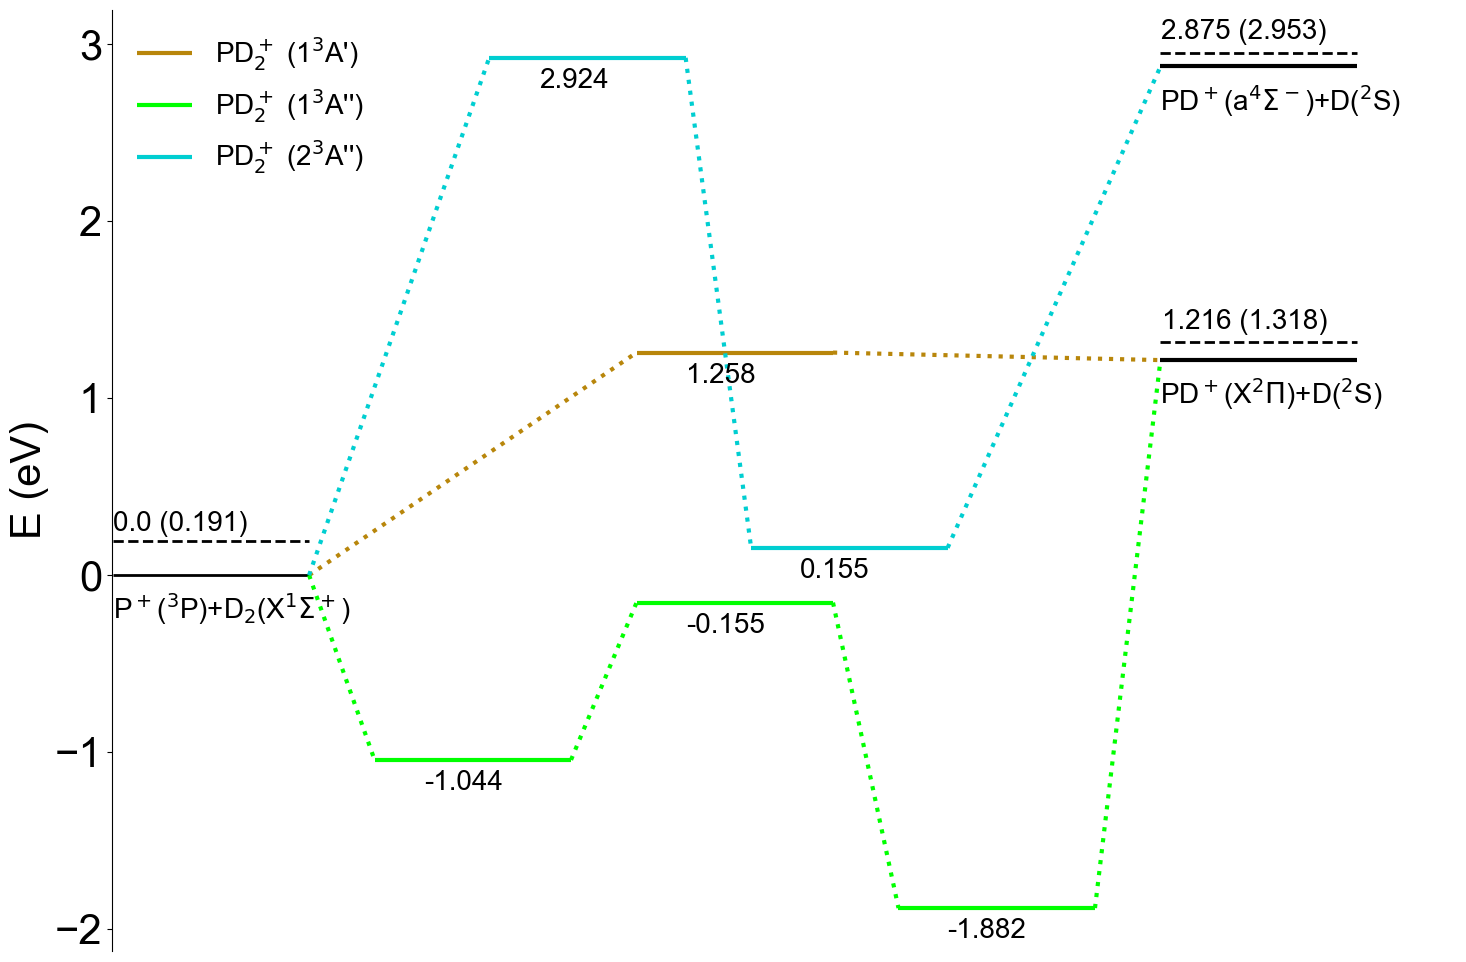

In [9]:
H2_sing = -341.5754255171
zeroas=mep_1TAp[0,3]

elim = -341.4415119944000025
emax_1TAp = np.max(mep_1TAp[:,3]-zeroas)*27.2114

emin1_1TApp = -1.0441477614580204
emin2_1TApp = -1.881612859536383
emax_1TApp = -0.1784801258566729165

emax_2TApp = -0.06532328852421404
emin_2TApp = -0.16709709364993403

emin_1SAp = -0.26281796064199847

emin1_1SApp = -0.19800881155102254
emin2_1SApp = -0.17484815777990764
emax_1SApp = -0.14859546547732835

emax_1TApp = (emax_1TApp - zeroas)*27.2114

emin_2TApp = emin_2TApp - zeroas
emax_2TApp = emax_2TApp - zeroas

H2_sing = H2_sing - elim
emin_1SAp = (emin_1SAp - H2_sing)
emin1_1SApp = (emin1_1SApp - H2_sing)
emin2_1SApp = (emin2_1SApp - H2_sing)
emax_1SApp = (emax_1SApp - H2_sing)

shift_1s = H2_sing - zeroas

first_en = -0.05
lentline = 12
sep=4.0

second_en = first_en + lentline + sep
third_en = second_en + lentline + sep
quad_en = third_en + lentline + sep
quint_en = quad_en + lentline + sep

plt.rcParams['font.family'] = 'sans-serif' # O 'serif', 'monospace', etc.
plt.rcParams['font.sans-serif'] = ['Arial'] # Reemplaza Arial por la fuente que quieras
plt.rcParams['font.size'] = 18

fig18,ax18 = plt.subplots(figsize=(15,10))

ax18.hlines(0,first_en,first_en+lentline,lw=2,color="black")
# ax18.hlines(shift_1s*27.2114,first_en,first_en+lentline,lw=2,color=(51.4/100,3.1/100,3.1/100))
ax18.hlines((mep_1TAp[-1,3]-zeroas)*27.2114,quint_en,quint_en+lentline,lw=3,color="black")
ax18.hlines((mep_2TApp[-1,3]-zeroas)*27.2114,quint_en,quint_en+lentline,lw=3,color="black")

#1TAp
ax18.hlines(emax_1TAp,third_en,third_en+lentline,lw=3,color=(72.2/100,52.5/100,4.3/100),label=r"PD$_2^+$ (1$^3$A')")
ax18.plot((first_en+lentline,third_en),(0,emax_1TAp),lw=3,ls=":",color=(72.2/100,52.5/100,4.3/100))
ax18.plot((third_en+lentline,quint_en),(emax_1TAp,(mep_1TAp[-1,3]-zeroas)*27.2114),lw=3,ls=":",color=(72.2/100,52.5/100,4.3/100))


#1TApp
ax18.hlines(emin1_1TApp,second_en,second_en+lentline,lw=3,color=(0.0,1.0,0.0),label=r"PD$_2^+$ (1$^3$A'')")
ax18.hlines(emax_1TApp,third_en,third_en+lentline,lw=3,color=(0.0,1.0,0.0))
ax18.hlines(emin2_1TApp,quad_en,quad_en+lentline,lw=3,color=(0.0,1.0,0.0))

ax18.plot((first_en+lentline,second_en),(0,emin1_1TApp),lw=3,ls=":",color=(0.0,1.0,0.0))
ax18.plot((second_en+lentline,third_en),(emin1_1TApp,emax_1TApp),lw=3,ls=":",color=(0.0,1.0,0.0))
ax18.plot((third_en+lentline,quad_en),(emax_1TApp,emin2_1TApp),lw=3,ls=":",color=(0.0,1.0,0.0))
ax18.plot((quad_en+lentline,quint_en),(emin2_1TApp,(mep_1TAp[-1,3]-zeroas)*27.2114),lw=3,ls=":",color=(0.0,1.0,0.0))

#2TApp
ax18.hlines(emax_2TApp*27.2114,second_en+0.75*sep+sep,second_en+lentline+0.75*sep+sep,lw=3,color=(0.0,80.8/100,82.0/100),label=r"PD$_2^+$ (2$^3$A'')")
ax18.hlines(emin_2TApp*27.2114,third_en+0.75*sep+sep,third_en+lentline+0.75*sep+sep,lw=3,color=(0.0,80.8/100,82.0/100))

ax18.plot((first_en+lentline,second_en+0.75*sep+sep),(0,emax_2TApp*27.2114),lw=3,ls=":",color=(0.0,80.8/100,82.0/100))
ax18.plot((second_en+lentline+0.75*sep+sep,third_en+0.75*sep+sep),(emax_2TApp*27.2114,emin_2TApp*27.2114),lw=3,ls=":",color=(0.0,80.8/100,82.0/100))
ax18.plot((third_en+lentline+0.75*sep+sep,quint_en),(emin_2TApp*27.2114,(mep_2TApp[-1,3]-zeroas)*27.2114),lw=3,ls=":",color=(0.0,80.8/100,82.0/100))

# #1SAp
# ax18.hlines(emin_1SAp*27.2114+shift_1s*27.2114,third_en,third_en+lentline,lw=2,color=(50.2/100,0.0,50.2/100),label=r"1 $^1$A'")

# ax18.plot((first_en+lentline,third_en),(shift_1s*27.2114,(emin_1SAp+shift_1s)*27.2114),lw=2,ls="--",color=(50.2/100,0.0,50.2/100))
# ax18.plot((third_en+lentline,quint_en),((emin_1SAp+shift_1s)*27.2114,(mep_1TAp[-1,3]-zeroas)*27.2114),lw=2,ls="--",color=(50.2/100,0.0,50.2/100))

# #1SApp
# ax18.hlines((emin1_1SApp+shift_1s)*27.2114,second_en,second_en+lentline,lw=2,color=(50.2/100,50.2/100,0.0),label=r"1 $^1$A''")
# ax18.hlines((emax_1SApp+shift_1s)*27.2114,third_en,third_en+lentline,lw=2,color=(50.2/100,50.2/100,0.0))
# ax18.hlines((emin2_1SApp+shift_1s)*27.2114,quad_en,quad_en+lentline,lw=2,color=(50.2/100,50.2/100,0.0))

# ax18.plot((first_en+lentline,second_en),(shift_1s*27.2114,(emin1_1SApp+shift_1s)*27.2114),lw=2,ls="--",color=(50.2/100,50.2/100,0.0))
# ax18.plot((second_en+lentline,third_en),((emin1_1SApp+shift_1s)*27.2114,(emax_1SApp+shift_1s)*27.2114),lw=2,ls="--",color=(50.2/100,50.2/100,0.0))
# ax18.plot((third_en+lentline,quad_en),((emax_1SApp+shift_1s)*27.2114,(emin2_1SApp+shift_1s)*27.2114),lw=2,ls="--",color=(50.2/100,50.2/100,0.0))
# ax18.plot((quad_en+lentline,quint_en),((emin2_1SApp+shift_1s)*27.2114,(mep_1TAp[-1,3]-zeroas)*27.2114),lw=2,ls="--",color=(50.2/100,50.2/100,0.0))

ax18.annotate(r"P$^+$($^3$P)+D$_2$(X$^1\Sigma^+$)",xy=(0,-0.25),fontsize=20)
# ax18.annotate(r"P$^+$($^1$D)+D$_2$(X$^1\Sigma^+$)",xy=(-0.01,shift_1s*27.2114-0.15),fontsize=20,color=(51.4/100,3.1/100,3.1/100))
ax18.annotate(r"PD$^+$(X$^2\Pi$)+D($^2$S)",xy=(quint_en,(mep_1TAp[-1,3]-zeroas)*27.2114-0.25),fontsize=20,color="black")
ax18.annotate(r"PD$^+$(a$^4\Sigma^-$)+D($^2$S)",xy=(quint_en,(mep_2TApp[-1,3]-zeroas)*27.2114-0.25),fontsize=20,color="black")

#ZPE
d2_zpe = 0.191
pd_zpe = 1.318
pdexc_zpe = 2.953

# ax18.annotate(r"{:.3f} ({:.3f})".format(emin1_1TApp,emin1_1TApp-d2_zpe),xy=(second_en,emin1_1TApp-0.12),fontsize=14)
# ax18.annotate(r"{:.3f} ({:.3f})".format(emax_1TApp,emax_1TApp-d2_zpe),xy=(third_en,emax_1TApp-0.12),fontsize=14)
# ax18.annotate(r"{:.3f} ({:.3f})".format(emin2_1TApp,emin2_1TApp-d2_zpe),xy=(quad_en,emin2_1TApp-0.12),fontsize=14)

# ax18.annotate(r"{:.3f} ({:.3f})".format(emin_2TApp*27.2114,emin_2TApp*27.2114-d2_zpe),xy=(third_en+sep*0.75+sep,emin_2TApp*27.2114-0.12),fontsize=14)
# ax18.annotate(r"{:.3f} ({:.3f})".format(emax_2TApp*27.2114,emax_2TApp*27.2114-d2_zpe),xy=(second_en+sep*0.75+sep+0.025,emax_2TApp*27.2114-0.12),fontsize=14)

# ax18.annotate(r"{:.3f} ({:.3f})".format(emax_1TAp,emax_1TAp-d2_zpe),xy=(third_en+0.05,emax_1TAp-0.12),fontsize=14)

ax18.annotate(r"{:.3f}".format(emin1_1TApp),xy=(second_en+0.75*sep,emin1_1TApp-0.17),fontsize=20)
ax18.annotate(r"{:.3f}".format(emax_1TApp),xy=(third_en+0.75*sep,emax_1TApp-0.17),fontsize=20)
ax18.annotate(r"{:.3f}".format(emin2_1TApp),xy=(quad_en+0.75*sep,emin2_1TApp-0.17),fontsize=20)

ax18.annotate(r"{:.3f}".format(emin_2TApp*27.2114),xy=(third_en+sep*0.75+sep+0.75*sep,emin_2TApp*27.2114-0.17),fontsize=20)
ax18.annotate(r"{:.3f}".format(emax_2TApp*27.2114),xy=(second_en+sep*0.75+sep+0.025+0.75*sep,emax_2TApp*27.2114-0.17),fontsize=20)

ax18.annotate(r"{:.3f}".format(emax_1TAp),xy=(third_en+0.05+0.75*sep,emax_1TAp-0.17),fontsize=20)

ax18.annotate(r"{:.1f} ({:.3f})".format(0,d2_zpe),xy=(first_en+0.05,0.25),fontsize=20)
ax18.annotate(r"{:.3f} ({:.3f})".format((mep_1TAp[-1,3]-zeroas)*27.2114,pd_zpe),xy=(quint_en+0.1,pd_zpe+0.075),fontsize=20)
ax18.annotate(r"{:.3f} ({:.3f})".format((mep_2TApp[-1,3]-zeroas)*27.2114,pdexc_zpe),xy=(quint_en+0.05,pdexc_zpe+0.075),fontsize=20)

ax18.hlines(d2_zpe,first_en,first_en+lentline,lw=2,ls="--",color="black")
ax18.hlines(pd_zpe,quint_en,quint_en+lentline,lw=2,ls="--",color="black")
ax18.hlines(pdexc_zpe,quint_en,quint_en+lentline,lw=2,ls="--",color="black")
# ax18.hlines(pdexc_zpe,quint_en+1111,quint_en+1111,lw=2,ls="--",color="black",label=r"ZPE D$_2$(X$^1\Sigma^+$)")
# ax18.hlines(pdexc_zpe,quint_en+1111,quint_en+1111,lw=2,ls="--",color="black",label=r"ZPE PD$^+$(X$^2\Pi$)")
# ax18.hlines(pdexc_zpe,quint_en+1111,quint_en+1111,lw=2,ls="--",color="black",label=r"ZPE PD$^+$(a$^4\Sigma^-$)")

ax18.set_xlim(-0.1,82)
ax18.set_xticks([])
ax18.spines['top'].set_visible(False)
ax18.spines['right'].set_visible(False)
ax18.spines['bottom'].set_visible(False)

ax18.legend(frameon=False,fontsize=20,loc="upper left")

ax18.tick_params(axis="y",labelsize=30)
ax18.set_ylabel("E (eV)", fontsize=30)

# Pat = plt.Circle((0,0),1,color="orange")
# # fig18 = plt.gcf()
# # ax18 = fig18.gca()
# ax18.add_artist(Pat)

fig18.tight_layout()
fig18.savefig("Ecorr_pts.png",dpi=300,transparent=True)
fig18.savefig("Ecorr_pts.svg",dpi=300,transparent=True)

In [ ]:
# Ruta guardada en 2TApp.dat
# Geom. minima 1: [6.040695 6.040695 1.4     ]
# Geom. maxima 1: [6.89883492 6.89883492 1.4       ]
# Energia minima 1: -0.1735245474987339
# Energia maxima 1: -0.1726822137320428
# Geom. minima 2: [2.799      2.92307843 3.2506223 ]
# Geom. maxima 2: [ 2.7 12.  12. ]
# Energia minima 2: -0.16709709364993403
# Energia maxima 2: -0.06650766107176524
# Geom. minima m: [6.00893619 6.00924383 1.41727   ]
# Geom. maxima m: [3.71970924 3.74219244 2.66211969]
# Energia minima m: -0.17357254171291564
# Energia maxima m: -0.06532328852421404

emax_2TApp = (-0.06532328852421404-zeroas)*27.2114
emin_2TApp = (-0.16709709364993403-zeroas)*27.2114
print(emax_2TApp,emin_2TApp)

In [ ]:
# Ruta guardada en 1SAp.dat
# # Geom. minima 1: [2.64235018 2.64235018 3.42923313]
# Geom. maxima 1: [12.  12.   1.4]
# Energia minima 1: -0.26281796064199847
# Energia maxima 1: -0.13421738259576452
# Geom. minima 2: [ 2.69520442 13.47449971 12.63119035]
# Geom. maxima 2: [ 2.7 12.  12. ]
# Energia minima 2: -0.12800404815493271
# Energia maxima 2: -0.12792070782009188
# Geom. minima m: [2.64235018 2.64235018 3.42923314]
# Geom. maxima m: [2.67431589 9.1935259  8.99448484]
# Energia minima m: -0.2628179606418538
# Energia maxima m: -0.12754389719956372

In [ ]:
# Ruta guardada en 1SApp.dat
# Geom. minima 1: [3.26117718 3.26117718 1.63592   ]
# Geom. maxima 1: [7.50168429 7.50168429 1.52144   ]
# Energia minima 1: -0.17484815777990764
# Energia maxima 1: -0.1293579604796911
# Geom. minima 2: [2.7        2.69288162 4.85299894]
# Geom. maxima 2: [ 2.7 12.  12. ]
# Energia minima 2: -0.19729080486440678
# Energia maxima 2: -0.12812878701933963
# Geom. minima m: [2.7119324  2.65961271 4.72463121]
# Geom. maxima m: [2.86541336 2.83326389 3.53544853]
# Energia minima m: -0.19800881155102254
# Energia maxima m: -0.14859546547732835

In [6]:
# max_geom_1TAp = [2.8000, 2.831, 3.162]
max_geom_1TAp = [2.8250*0.52917, 5.624*0.52917, 2.8273*0.52917]
max_geom_1TAp = [2.8250*0.5219, 5.452*0.5219, 2.6273*0.5219]
# max_geom_1TAp = [3.25*0.5219, 4.157*0.5219, 2.59*0.5219]
min_geom_1TApp = [3.258, 3.258, 1.595]
minl_geom_1TApp = [2.670, 2.670, 4.693]
max_geom_1TApp = [3.003, 3.003, 2.941]
min_geom_2TApp = [2.799, 2.923, 3.250]
max_geom_2TApp = [3.720, 3.742, 2.662]

def tri_to_cart_from_distances(r12, r13, r23, chirality=+1):
    """
    Devuelve coordenadas cartesianas (3x3) para tres átomos a partir de r12,r13,r23.
    R1=(0,0,0), R2=(r12,0,0), R3=(x3,y3,0). 'chirality' = +1 o -1.
    Unidades: las que uses para las distancias.
    """
    r12 = float(r12); r13 = float(r13); r23 = float(r23)
    # Comprobación desigualdad del triángulo
    if not (r12 < r13 + r23 and r13 < r12 + r23 and r23 < r12 + r13):
        raise ValueError("Las distancias no cumplen la desigualdad del triángulo.")

    # Átomo 1 y 2
    R1 = np.array([0.0, 0.0, 0.0])
    R2 = np.array([r12, 0.0, 0.0])

    # Coordenadas de 3
    x3 = (r12**2 + r13**2 - r23**2) / (2.0 * r12)
    y2 = r13**2 - x3**2
    # Corrección numérica si hay redondeo
    y3 = 0.0 if y2 < 0.0 and abs(y2) < 1e-12 else np.sqrt(y2)
    y3 *= np.sign(chirality)  # +1 o -1

    R3 = np.array([x3, y3, 0.0])
    return np.vstack([R1, R2, R3])

max_cart_1TAp = tri_to_cart_from_distances(max_geom_1TAp[0],max_geom_1TAp[1],max_geom_1TAp[2])
print(max_cart_1TAp)
min_cart_1TApp = tri_to_cart_from_distances(min_geom_1TApp[0],min_geom_1TApp[1],min_geom_1TApp[2])
min1_cart_1TApp = tri_to_cart_from_distances(minl_geom_1TApp[0],minl_geom_1TApp[1],minl_geom_1TApp[2])
max_cart_1TApp = tri_to_cart_from_distances(max_geom_1TApp[0],max_geom_1TApp[1],max_geom_1TApp[2])
min_cart_2TApp = tri_to_cart_from_distances(min_geom_2TApp[0],min_geom_2TApp[1],min_geom_2TApp[2])
max_cart_2TApp = tri_to_cart_from_distances(max_geom_2TApp[0],max_geom_2TApp[1],max_geom_2TApp[2])

[[0.         0.         0.        ]
 [1.4743675  0.         0.        ]
 [2.8452532  0.02878515 0.        ]]


In [16]:
print(get_ic(2.2,3.02,90.0))

(np.float64(2.6683515510516975), np.float64(2.6683515510516975), 3.02)


In [15]:
def theta_at_2(r12, r13, r23):
    # ángulo entre los segmentos (1–2) y (2–3), en radianes
    num = r12**2 + r23**2 - r13**2
    den = 2.0 * r12 * r23
    c = np.clip(num / den, -1.0, 1.0)
    return np.arccos(c)

def theta_deg_at_2(r12, r13, r23):
    return np.degrees(theta_at_2(r12, r13, r23))

sp = [2.8250,5.4522,2.62731]
sp = [3.258, 3.258, 1.595]
sp = [2.670, 2.670, 4.693]
sp = [3.003, 3.003, 2.941]
sp = [2.799, 2.923, 3.251]
sp = [3.720, 3.742, 2.662]
print(theta_deg_at_2(sp[0],sp[1],sp[2]))

69.5428483373795


In [18]:
ic = [2.6684, 2.6684, 3.02]
ic = [2.70, 4.3144, 7.0149]
print(theta_deg_at_2(ic[0],ic[1],ic[2]))

0.0


In [25]:
def theta_HPH(r_PH1, r_PH2, r_HH):
    """
    Ángulo H–P–H en radianes.
    Acepta escalares o arrays broadcasteables.
    """
    r_PH1 = np.asarray(r_PH1, dtype=float)
    r_PH2 = np.asarray(r_PH2, dtype=float)
    r_HH  = np.asarray(r_HH,  dtype=float)

    num = r_PH1**2 + r_PH2**2 - r_HH**2
    den = 2.0 * r_PH1 * r_PH2
    # evita divisiones por cero
    c = np.where(den > 0, num/den, np.nan)
    c = np.clip(c, -1.0, 1.0)  # robustez numérica
    return np.arccos(c)

def theta_deg_HPH(r_PH1, r_PH2, r_HH):
    """Ángulo H–P–H en grados."""
    return np.degrees(theta_HPH(r_PH1, r_PH2, r_HH))

sp = [2.8250,5.4522,2.62731]
sp = [3.258, 3.258, 1.595]
sp = [2.670, 2.670, 4.693]
sp = [3.003, 3.003, 2.941]
sp = [2.799, 2.923, 3.251]
sp = [3.720, 3.742, 2.662]
print(theta_deg_HPH(sp[0],sp[1],sp[2]))

41.79904177629811


In [27]:
ic = [2.6684, 2.6684, 3.02]
# ic = [2.70, 4.3144, 7.0149]
print(theta_deg_HPH(ic[0],ic[1],ic[2]))

68.92714734810612
